In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.2.4-tf'

# Preparing the data

In [2]:
data=pd.read_json('News-Classification-DataSet.json',lines=True)

In [3]:
data.head()

annotation  \
0  {'notes': '', 'label': ['Business']}   
1   {'notes': '', 'label': ['SciTech']}   
2   {'notes': '', 'label': ['SciTech']}   
3   {'notes': '', 'label': ['SciTech']}   
4   {'notes': '', 'label': ['SciTech']}   

                                             content  extras  \
0  Unions representing workers at Turner   Newall...     NaN   
1  SPACE.com - TORONTO, Canada -- A second\team o...     NaN   
2  AP - A company founded by a chemistry research...     NaN   
3  AP - It's barely dawn when Mike Fitzpatrick st...     NaN   
4  AP - Southern California's smog-fighting agenc...     NaN   

                                            metadata  
0  {'first_done_at': 1521027375000, 'last_updated...  
1  {'first_done_at': 1521027375000, 'last_updated...  
2  {'first_done_at': 1521027375000, 'last_updated...  
3  {'first_done_at': 1521027375000, 'last_updated...  
4  {'first_done_at': 1521027375000, 'last_updated...

In [4]:
labels=data[['annotation']]
for i,row in labels.iterrows():
    labels.iloc[i]['annotation']=labels.iloc[i]['annotation']['label'][0]


In [5]:
new_data=pd.concat([labels,data[['content']]],axis=1)
new_data.columns=['labels','content']
new_data.head()

labels                                            content
0  Business  Unions representing workers at Turner   Newall...
1   SciTech  SPACE.com - TORONTO, Canada -- A second\team o...
2   SciTech  AP - A company founded by a chemistry research...
3   SciTech  AP - It's barely dawn when Mike Fitzpatrick st...
4   SciTech  AP - Southern California's smog-fighting agenc...

# Labels

In [6]:
list(set(new_data['labels']))

['Sports', 'SciTech', 'World', 'Business']

# A content

In [7]:
new_data.content[0]

"Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."

# Preprocessing the data

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(new_data.content)
sequences = tokenizer.texts_to_sequences(new_data.content)
content_token = pad_sequences(sequences, maxlen=100)

Using TensorFlow backend.


In [9]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'from': 22,
 'an': 23,
 'his': 24,
 'reuters': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'two': 30,
 'their': 31,
 'be': 32,
 'us': 33,
 'over': 34,
 'first': 35,
 'are': 36,
 'quot': 37,
 'year': 38,
 'ap': 39,
 'he': 40,
 'this': 41,
 'tuesday': 42,
 'monday': 43,
 'but': 44,
 'one': 45,
 'more': 46,
 'up': 47,
 'thursday': 48,
 'gt': 49,
 'lt': 50,
 'inc': 51,
 'wednesday': 52,
 'company': 53,
 'they': 54,
 'friday': 55,
 'who': 56,
 'against': 57,
 'world': 58,
 'than': 59,
 'last': 60,
 'u': 61,
 'york': 62,
 'into': 63,
 'been': 64,
 'were': 65,
 'out': 66,
 'not': 67,
 '1': 68,
 'yesterday': 69,
 'president': 70,
 'about': 71,
 '2': 72,
 'when': 73,
 'three': 74,
 'week': 75,
 'million': 76,
 'had': 77,
 'years': 78,
 'second': 79,
 'w

In [10]:
vocab_len=len(tokenizer.word_index)+1
vocab_len

20585

# A tokenized content

In [11]:
content_token[3000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 3945, 2999,  458, 2103, 2827,   20,
          4,    3, 2242,    3,    1,  186,    4,    1,  575,  164,    5,
       1927], dtype=int32)

In [12]:
def Multi_binarizer(labels):
    l=list(set(labels))
    n=len(labels)
    for i in range(n):
        labels[i]=l.index(labels[i])
    return labels

In [13]:
binarized_labels=np.array(Multi_binarizer(new_data['labels']))

In [14]:
binarized_labels

array([3, 1, 1, ..., 0, 3, 3], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold

content_train, content_test, labels_train, labels_test = train_test_split(content_token, binarized_labels, test_size=0.1, random_state=7)

In [16]:
labels_train

array([2, 2, 1, ..., 1, 2, 0], dtype=object)

In [17]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(labels_train)
one_hot_test_labels = to_categorical(labels_test)

In [18]:
one_hot_train_labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [19]:
one_hot_train_labels.shape

(6840, 4)

In [20]:
content_train.shape

(6840, 100)

In [21]:
len(content_test)

760

# Validation Setup

In [22]:
Valid_bag=[]
n=content_train.shape[0]
k=n//10 #Validation folds, here its 10

for i in range(0,n,k):
    content_val=content_train[i:k+i]
    partial_cont_train=np.array(list(content_train[:i])+list(content_train[k+i:]))
    
    label_val=one_hot_train_labels[i:k+i]
    partial_lab_train=np.array(list(one_hot_train_labels[:i])+list(one_hot_train_labels[k+i:]))
    
    Valid_bag+=[(partial_cont_train,partial_lab_train,content_val,label_val)]

In [23]:
len(Valid_bag[0][1])

6156

In [24]:
import matplotlib.pyplot as plt 

# Importing the keras packages 

In [25]:
from keras import models,layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

# Trying out different models

# Model 1

In [26]:
model = Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(100,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(46, activation='sigmoid'))
model.add(layers.Dense(48, activation='softmax'))
model.add(layers.Dense(64,activation='sigmoid'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


#### Accuracy

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
_________________________________________________________________
dense_6 (Dense)              (None, 48)                2256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                3136      
__________


 Fold  1
Instructions for updating:
Use tf.cast instead.
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 4s 653us/step - loss: 1.3865 - acc: 0.2489 - val_loss: 1.3866 - val_acc: 0.2237
Epoch 2/10
6156/6156 [==============================] - 1s 220us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3865 - val_acc: 0.2237
Epoch 3/10
6156/6156 [==============================] - 1s 220us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3867 - val_acc: 0.2237
Epoch 4/10
6156/6156 [==============================] - 1s 207us/step - loss: 1.3864 - acc: 0.2537 - val_loss: 1.3866 - val_acc: 0.2237
Epoch 5/10
6156/6156 [==============================] - 1s 151us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3867 - val_acc: 0.2237
Epoch 6/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3868 - val_acc: 0.2237
Epoch 7/10
6156/6156 [==============================] - 1s 147us/step - loss: 1

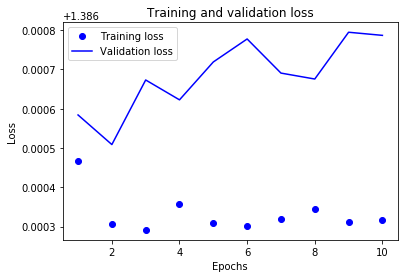

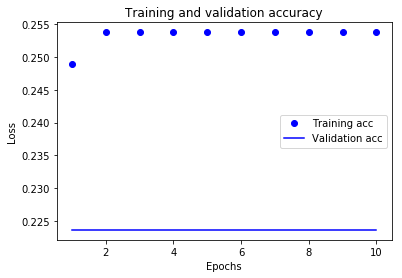


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - acc: 0.2498 - val_loss: 1.3862 - val_acc: 0.2588
Epoch 2/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2419 - val_loss: 1.3863 - val_acc: 0.2456
Epoch 3/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2445 - val_loss: 1.3862 - val_acc: 0.2588
Epoch 4/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2485 - val_loss: 1.3862 - val_acc: 0.2456
Epoch 5/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2521 - val_loss: 1.3863 - val_acc: 0.2456
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3864 - acc: 0.2521 - val_loss: 1.3863 - val_acc: 0.2456
Epoch 7/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2521 - val_loss: 1.3863 - val_acc

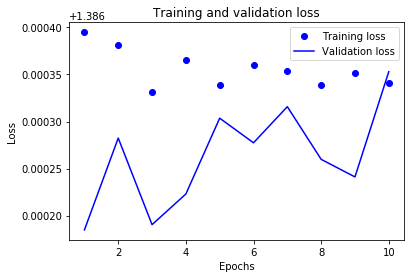

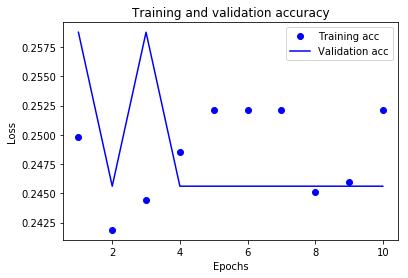


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3864 - acc: 0.2490 - val_loss: 1.3862 - val_acc: 0.2734
Epoch 2/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - acc: 0.2430 - val_loss: 1.3864 - val_acc: 0.2208
Epoch 3/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2450 - val_loss: 1.3864 - val_acc: 0.2208
Epoch 4/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3867 - val_acc: 0.2208
Epoch 5/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3868 - val_acc: 0.2208
Epoch 6/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3867 - val_acc: 0.2208
Epoch 7/10
6156/6156 [==============================] - 1s 146us/step - loss: 1.3863 - acc: 0.2537 - val_loss: 1.3868 - val_acc

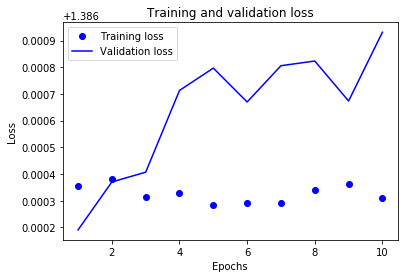

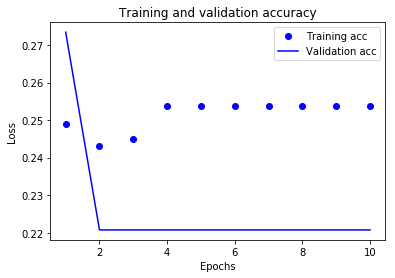


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2490 - val_loss: 1.3862 - val_acc: 0.2632
Epoch 2/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2506 - val_loss: 1.3867 - val_acc: 0.2208
Epoch 3/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2541 - val_loss: 1.3866 - val_acc: 0.2208
Epoch 4/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2541 - val_loss: 1.3867 - val_acc: 0.2208
Epoch 5/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2541 - val_loss: 1.3868 - val_acc: 0.2208
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2541 - val_loss: 1.3867 - val_acc: 0.2208
Epoch 7/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2541 - val_loss: 1.3870 - val_acc

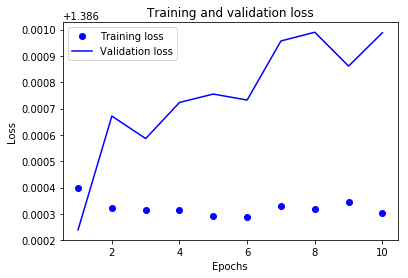

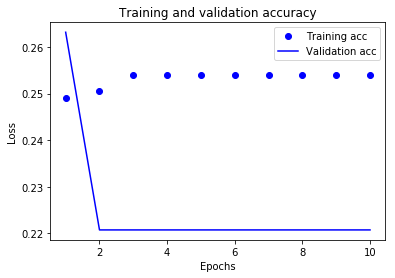


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3864 - acc: 0.2479 - val_loss: 1.3859 - val_acc: 0.2763
Epoch 2/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - acc: 0.2385 - val_loss: 1.3863 - val_acc: 0.2164
Epoch 3/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - acc: 0.2438 - val_loss: 1.3863 - val_acc: 0.2763
Epoch 4/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - acc: 0.2412 - val_loss: 1.3865 - val_acc: 0.2485
Epoch 5/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2427 - val_loss: 1.3865 - val_acc: 0.2485
Epoch 6/10
6156/6156 [==============================] - 1s 152us/step - loss: 1.3863 - acc: 0.2409 - val_loss: 1.3866 - val_acc: 0.2164
Epoch 7/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - acc: 0.2445 - val_loss: 1.3865 - val_acc

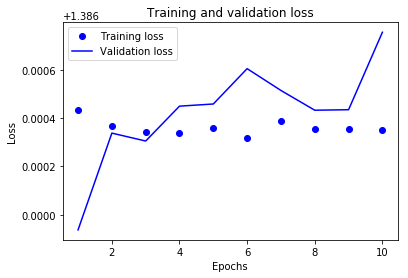

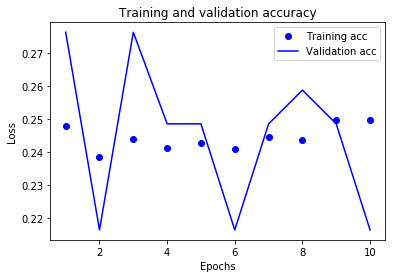


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2463 - val_loss: 1.3865 - val_acc: 0.2325
Epoch 2/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - acc: 0.2505 - val_loss: 1.3867 - val_acc: 0.2325
Epoch 3/10
6156/6156 [==============================] - 1s 146us/step - loss: 1.3863 - acc: 0.2489 - val_loss: 1.3869 - val_acc: 0.2325
Epoch 4/10
6156/6156 [==============================] - 1s 146us/step - loss: 1.3862 - acc: 0.2524 - val_loss: 1.3870 - val_acc: 0.2456
Epoch 5/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2521 - val_loss: 1.3871 - val_acc: 0.2456
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2479 - val_loss: 1.3873 - val_acc: 0.2325
Epoch 7/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2433 - val_loss: 1.3871 - val_acc

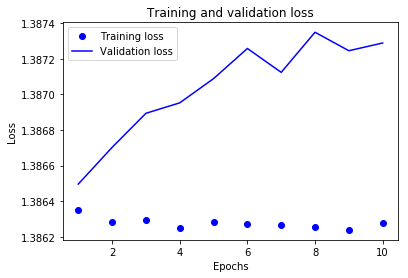

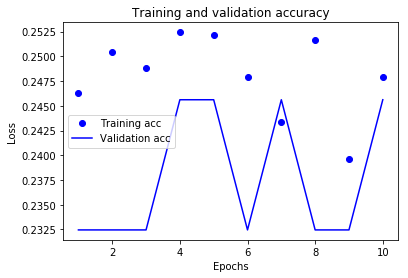


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2497 - val_loss: 1.3867 - val_acc: 0.2339
Epoch 2/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2534 - val_loss: 1.3868 - val_acc: 0.2339
Epoch 3/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2534 - val_loss: 1.3867 - val_acc: 0.2339
Epoch 4/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2534 - val_loss: 1.3868 - val_acc: 0.2339
Epoch 5/10
6156/6156 [==============================] - 1s 152us/step - loss: 1.3863 - acc: 0.2534 - val_loss: 1.3868 - val_acc: 0.2339
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2534 - val_loss: 1.3867 - val_acc: 0.2339
Epoch 7/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - acc: 0.2534 - val_loss: 1.3868 - val_acc

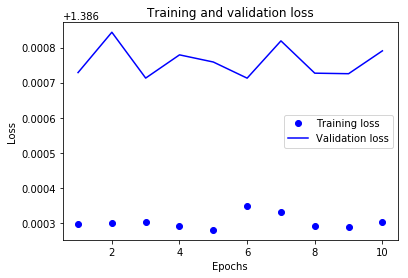

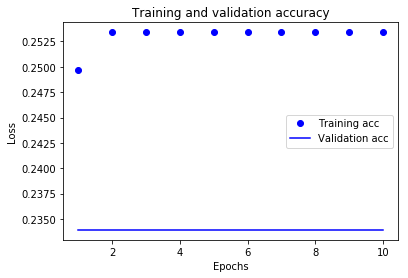


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 146us/step - loss: 1.3864 - acc: 0.2508 - val_loss: 1.3861 - val_acc: 0.2573
Epoch 2/10
6156/6156 [==============================] - 1s 162us/step - loss: 1.3864 - acc: 0.2508 - val_loss: 1.3861 - val_acc: 0.2573
Epoch 3/10
6156/6156 [==============================] - 1s 161us/step - loss: 1.3863 - acc: 0.2445 - val_loss: 1.3863 - val_acc: 0.2471
Epoch 4/10
6156/6156 [==============================] - 1s 160us/step - loss: 1.3863 - acc: 0.2511 - val_loss: 1.3862 - val_acc: 0.2471
Epoch 5/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3864 - acc: 0.2492 - val_loss: 1.3862 - val_acc: 0.2573
Epoch 6/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2430 - val_loss: 1.3862 - val_acc: 0.2471
Epoch 7/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - acc: 0.2442 - val_loss: 1.3863 - val_acc

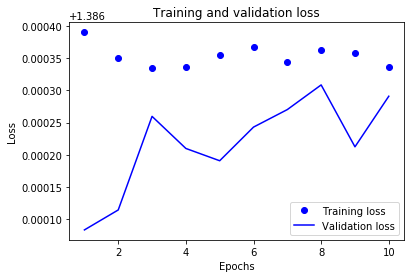

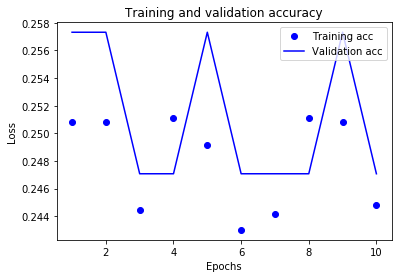


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2523 - val_loss: 1.3864 - val_acc: 0.2251
Epoch 2/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2544 - val_loss: 1.3868 - val_acc: 0.2251
Epoch 3/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2544 - val_loss: 1.3868 - val_acc: 0.2251
Epoch 4/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2544 - val_loss: 1.3869 - val_acc: 0.2251
Epoch 5/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2544 - val_loss: 1.3870 - val_acc: 0.2251
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2544 - val_loss: 1.3870 - val_acc: 0.2251
Epoch 7/10
6156/6156 [==============================] - 1s 146us/step - loss: 1.3863 - acc: 0.2544 - val_loss: 1.3870 - val_acc

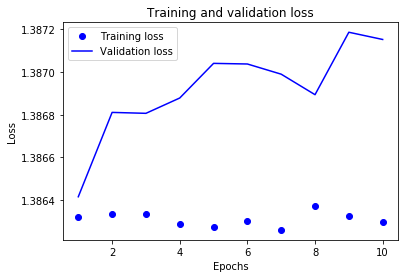

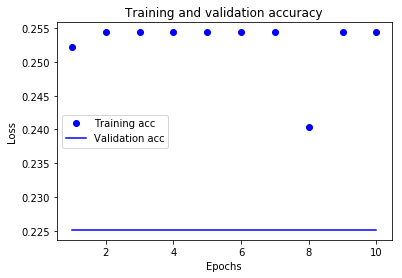


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3864 - acc: 0.2536 - val_loss: 1.3871 - val_acc: 0.2325
Epoch 2/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3863 - acc: 0.2536 - val_loss: 1.3871 - val_acc: 0.2325
Epoch 3/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2536 - val_loss: 1.3872 - val_acc: 0.2325
Epoch 4/10
6156/6156 [==============================] - 1s 147us/step - loss: 1.3862 - acc: 0.2536 - val_loss: 1.3875 - val_acc: 0.2325
Epoch 5/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3862 - acc: 0.2536 - val_loss: 1.3875 - val_acc: 0.2325
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - acc: 0.2536 - val_loss: 1.3874 - val_acc: 0.2325
Epoch 7/10
6156/6156 [==============================] - 1s 153us/step - loss: 1.3862 - acc: 0.2536 - val_loss: 1.3875 - val_ac

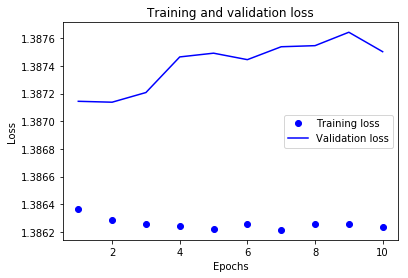

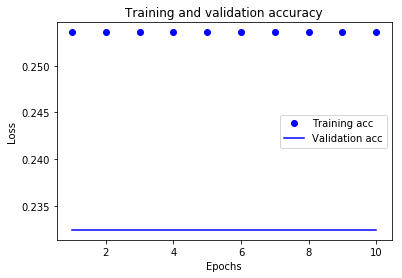

In [28]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#### Categorical Accuracy

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
_________________________________________________________________
dense_6 (Dense)              (None, 48)                2256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                3136      
__________


 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 4s 626us/step - loss: 1.3864 - categorical_accuracy: 0.2442 - val_loss: 1.3864 - val_categorical_accuracy: 0.2237
Epoch 2/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3863 - categorical_accuracy: 0.2503 - val_loss: 1.3865 - val_categorical_accuracy: 0.2237
Epoch 3/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3864 - categorical_accuracy: 0.2537 - val_loss: 1.3866 - val_categorical_accuracy: 0.2237
Epoch 4/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2537 - val_loss: 1.3866 - val_categorical_accuracy: 0.2237
Epoch 5/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2537 - val_loss: 1.3868 - val_categorical_accuracy: 0.2237
Epoch 6/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - catego

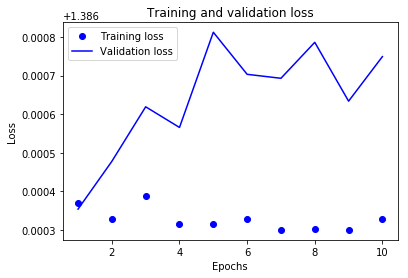

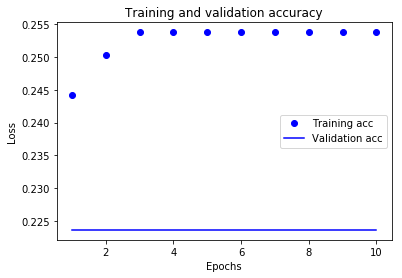


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 152us/step - loss: 1.3864 - categorical_accuracy: 0.2498 - val_loss: 1.3861 - val_categorical_accuracy: 0.2588
Epoch 2/10
6156/6156 [==============================] - 1s 152us/step - loss: 1.3864 - categorical_accuracy: 0.2498 - val_loss: 1.3862 - val_categorical_accuracy: 0.2588
Epoch 3/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2472 - val_loss: 1.3861 - val_categorical_accuracy: 0.2456
Epoch 4/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2442 - val_loss: 1.3864 - val_categorical_accuracy: 0.2456
Epoch 5/10
6156/6156 [==============================] - 1s 151us/step - loss: 1.3863 - categorical_accuracy: 0.2521 - val_loss: 1.3863 - val_categorical_accuracy: 0.2456
Epoch 6/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - catego

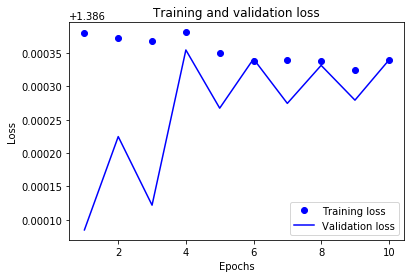

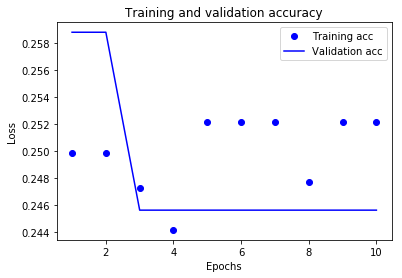


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 156us/step - loss: 1.3864 - categorical_accuracy: 0.2419 - val_loss: 1.3862 - val_categorical_accuracy: 0.2734
Epoch 2/10
6156/6156 [==============================] - 1s 151us/step - loss: 1.3864 - categorical_accuracy: 0.2404 - val_loss: 1.3862 - val_categorical_accuracy: 0.2734
Epoch 3/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2471 - val_loss: 1.3865 - val_categorical_accuracy: 0.2208
Epoch 4/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2537 - val_loss: 1.3866 - val_categorical_accuracy: 0.2208
Epoch 5/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2537 - val_loss: 1.3866 - val_categorical_accuracy: 0.2208
Epoch 6/10
6156/6156 [==============================] - 1s 159us/step - loss: 1.3863 - catego

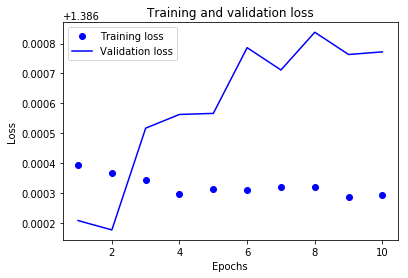

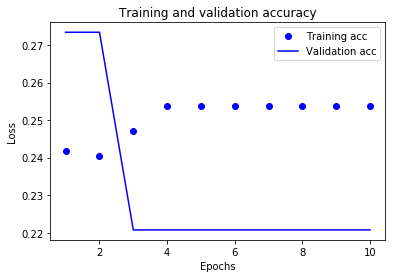


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2490 - val_loss: 1.3864 - val_categorical_accuracy: 0.2632
Epoch 2/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3864 - categorical_accuracy: 0.2479 - val_loss: 1.3866 - val_categorical_accuracy: 0.2208
Epoch 3/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2541 - val_loss: 1.3867 - val_categorical_accuracy: 0.2208
Epoch 4/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2541 - val_loss: 1.3867 - val_categorical_accuracy: 0.2208
Epoch 5/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2541 - val_loss: 1.3869 - val_categorical_accuracy: 0.2208
Epoch 6/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - catego

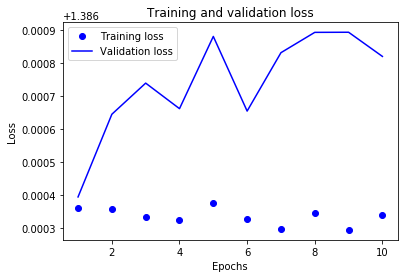

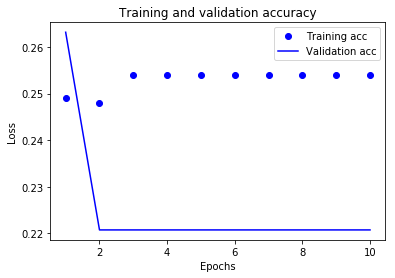


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3865 - categorical_accuracy: 0.2386 - val_loss: 1.3859 - val_categorical_accuracy: 0.2763
Epoch 2/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2479 - val_loss: 1.3860 - val_categorical_accuracy: 0.2763
Epoch 3/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2479 - val_loss: 1.3863 - val_categorical_accuracy: 0.2763
Epoch 4/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3863 - categorical_accuracy: 0.2370 - val_loss: 1.3863 - val_categorical_accuracy: 0.2588
Epoch 5/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2506 - val_loss: 1.3865 - val_categorical_accuracy: 0.2588
Epoch 6/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - catego

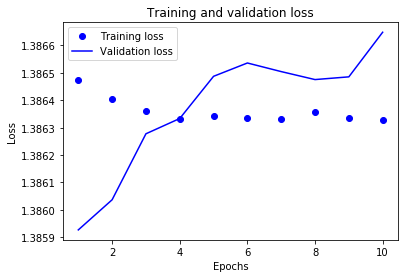

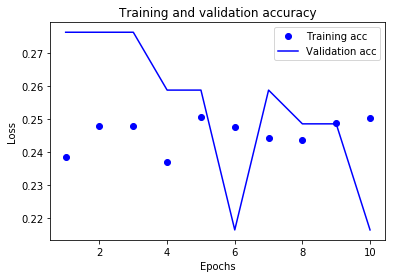


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 154us/step - loss: 1.3863 - categorical_accuracy: 0.2487 - val_loss: 1.3864 - val_categorical_accuracy: 0.2456
Epoch 2/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3863 - categorical_accuracy: 0.2526 - val_loss: 1.3868 - val_categorical_accuracy: 0.2325
Epoch 3/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2524 - val_loss: 1.3869 - val_categorical_accuracy: 0.2325
Epoch 4/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3863 - categorical_accuracy: 0.2471 - val_loss: 1.3870 - val_categorical_accuracy: 0.2325
Epoch 5/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3863 - categorical_accuracy: 0.2484 - val_loss: 1.3871 - val_categorical_accuracy: 0.2325
Epoch 6/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - catego

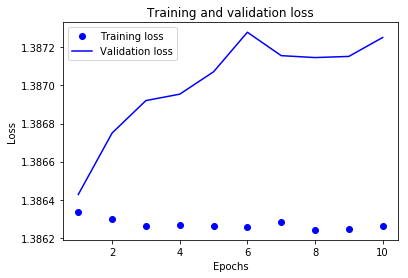

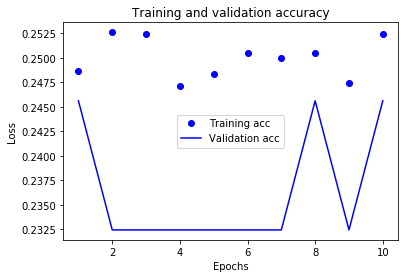


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2474 - val_loss: 1.3869 - val_categorical_accuracy: 0.2339
Epoch 2/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2534 - val_loss: 1.3867 - val_categorical_accuracy: 0.2339
Epoch 3/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2534 - val_loss: 1.3867 - val_categorical_accuracy: 0.2339
Epoch 4/10
6156/6156 [==============================] - 1s 151us/step - loss: 1.3863 - categorical_accuracy: 0.2534 - val_loss: 1.3867 - val_categorical_accuracy: 0.2339
Epoch 5/10
6156/6156 [==============================] - 1s 157us/step - loss: 1.3863 - categorical_accuracy: 0.2534 - val_loss: 1.3868 - val_categorical_accuracy: 0.2339
Epoch 6/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3863 - catego

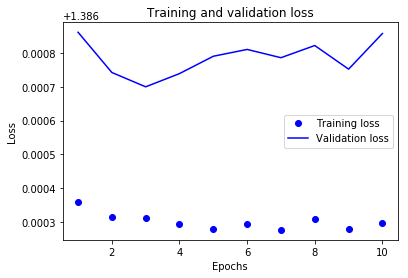

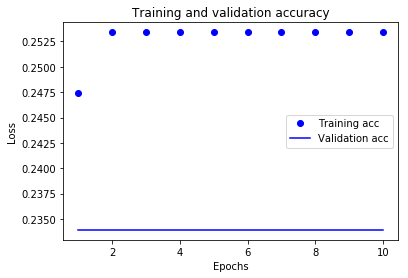


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2508 - val_loss: 1.3860 - val_categorical_accuracy: 0.2573
Epoch 2/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2508 - val_loss: 1.3861 - val_categorical_accuracy: 0.2573
Epoch 3/10
6156/6156 [==============================] - 1s 148us/step - loss: 1.3863 - categorical_accuracy: 0.2468 - val_loss: 1.3862 - val_categorical_accuracy: 0.2471
Epoch 4/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - categorical_accuracy: 0.2469 - val_loss: 1.3861 - val_categorical_accuracy: 0.2573
Epoch 5/10
6156/6156 [==============================] - 1s 149us/step - loss: 1.3863 - categorical_accuracy: 0.2508 - val_loss: 1.3862 - val_categorical_accuracy: 0.2573
Epoch 6/10
6156/6156 [==============================] - 1s 150us/step - loss: 1.3864 - catego

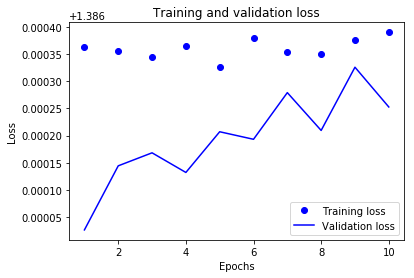

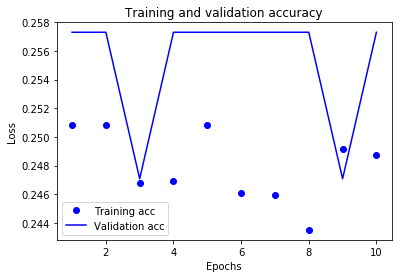


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 170us/step - loss: 1.3863 - categorical_accuracy: 0.2544 - val_loss: 1.3865 - val_categorical_accuracy: 0.2251
Epoch 2/10
6156/6156 [==============================] - 1s 188us/step - loss: 1.3863 - categorical_accuracy: 0.2544 - val_loss: 1.3867 - val_categorical_accuracy: 0.2251
Epoch 3/10
6156/6156 [==============================] - 1s 219us/step - loss: 1.3863 - categorical_accuracy: 0.2544 - val_loss: 1.3869 - val_categorical_accuracy: 0.2251
Epoch 4/10
6156/6156 [==============================] - 1s 190us/step - loss: 1.3863 - categorical_accuracy: 0.2544 - val_loss: 1.3869 - val_categorical_accuracy: 0.2251
Epoch 5/10
6156/6156 [==============================] - 1s 199us/step - loss: 1.3863 - categorical_accuracy: 0.2544 - val_loss: 1.3871 - val_categorical_accuracy: 0.2251
Epoch 6/10
6156/6156 [==============================] - 1s 212us/step - loss: 1.3863 - catego

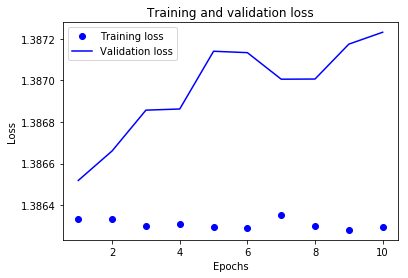

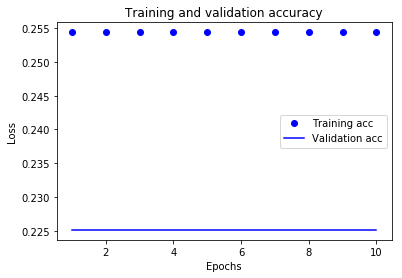


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 1s 158us/step - loss: 1.3863 - categorical_accuracy: 0.2536 - val_loss: 1.3870 - val_categorical_accuracy: 0.2325
Epoch 2/10
6156/6156 [==============================] - 1s 166us/step - loss: 1.3863 - categorical_accuracy: 0.2536 - val_loss: 1.3872 - val_categorical_accuracy: 0.2325
Epoch 3/10
6156/6156 [==============================] - 1s 176us/step - loss: 1.3863 - categorical_accuracy: 0.2536 - val_loss: 1.3873 - val_categorical_accuracy: 0.2325
Epoch 4/10
6156/6156 [==============================] - 1s 192us/step - loss: 1.3863 - categorical_accuracy: 0.2536 - val_loss: 1.3873 - val_categorical_accuracy: 0.2325
Epoch 5/10
6156/6156 [==============================] - 1s 212us/step - loss: 1.3862 - categorical_accuracy: 0.2536 - val_loss: 1.3875 - val_categorical_accuracy: 0.2325
Epoch 6/10
6156/6156 [==============================] - 1s 214us/step - loss: 1.3863 - categ

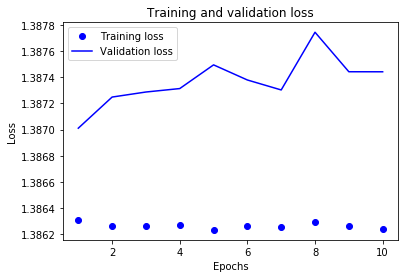

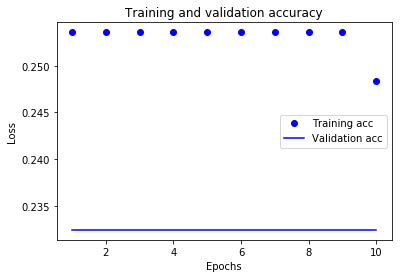

In [30]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Model 2

In [31]:
model = Sequential()
model.add(Embedding(vocab_len, 100, input_length=100))
model.add(LSTM(100))
model.add(Dense(4, activation='sigmoid'))

#### Accuracy

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 404       
Total params: 2,139,304
Trainable params: 2,139,304
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 61s 10ms/step - loss: 1.2572 - acc: 0.4753 - val_loss: 0.9858 - val_acc: 0.6301
Epoch 2/10
6156/6156 [==============================] - 51s 8ms/step - loss: 0.7294 - acc: 0.7770 - val_loss: 0.6385 - val_acc: 0.8582
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.4127 - acc: 0.8783 - val_loss: 0.4782 - val_acc: 0.8392
Epoch 4/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.2599 - acc: 0.9235 - val_loss: 0.4486 - val_acc: 0.8582
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.1806 - acc: 0.9516 - val_loss: 0.4621 - val_acc: 0.8699
Epoch 6/10
6156/6156 [==============================] - 55s 9ms/step - loss: 0.1317 - acc: 0.9675 - val_loss: 0.5787 - val_acc: 0.8450
Epoch 7/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.1544 - acc: 0.9607 - val_loss: 0.5201 - val_acc: 0.84

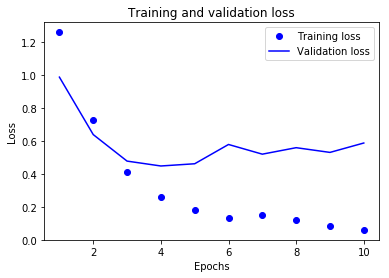

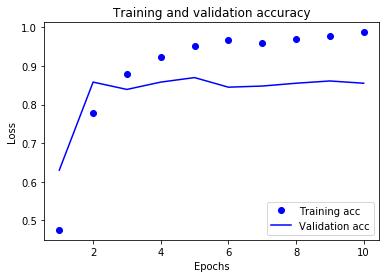


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 46s 7ms/step - loss: 0.1151 - acc: 0.9730 - val_loss: 0.0801 - val_acc: 0.9795
Epoch 2/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0817 - acc: 0.9821 - val_loss: 0.0873 - val_acc: 0.9795
Epoch 3/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0595 - acc: 0.9868 - val_loss: 0.0831 - val_acc: 0.9722
Epoch 4/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0476 - acc: 0.9903 - val_loss: 0.0843 - val_acc: 0.9751
Epoch 5/10
6156/6156 [==============================] - 48s 8ms/step - loss: 0.0401 - acc: 0.9927 - val_loss: 0.0956 - val_acc: 0.9708
Epoch 6/10
6156/6156 [==============================] - 46s 7ms/step - loss: 0.0308 - acc: 0.9938 - val_loss: 0.1050 - val_acc: 0.9649
Epoch 7/10
6156/6156 [==============================] - 50s 8ms/step - loss: 0.0314 - acc: 0.9924 - val_loss: 0.1301 - val_acc: 0.959

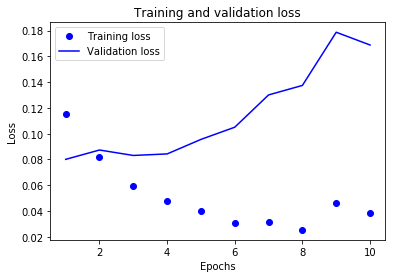

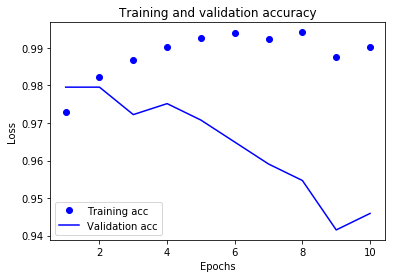


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 46s 7ms/step - loss: 0.0432 - acc: 0.9890 - val_loss: 0.0162 - val_acc: 0.9956
Epoch 2/10
6156/6156 [==============================] - 47s 8ms/step - loss: 0.0203 - acc: 0.9955 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0255 - acc: 0.9929 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 4/10
6156/6156 [==============================] - 46s 7ms/step - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0315 - val_acc: 0.9898
Epoch 5/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0151 - acc: 0.9963 - val_loss: 0.0387 - val_acc: 0.9868
Epoch 6/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0137 - acc: 0.9964 - val_loss: 0.0342 - val_acc: 0.9912
Epoch 7/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0081 - acc: 0.9981 - val_loss: 0.0368 - val_acc: 0.991

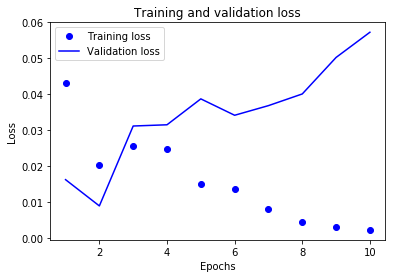

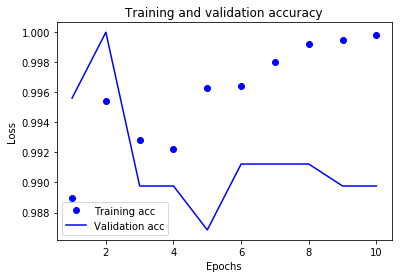


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 45s 7ms/step - loss: 0.0089 - acc: 0.9982 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0145 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 47s 8ms/step - loss: 0.0018 - acc: 0.9998 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 49s 8ms/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 43s 7ms/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 44s 7ms/step - loss: 6.7194e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1

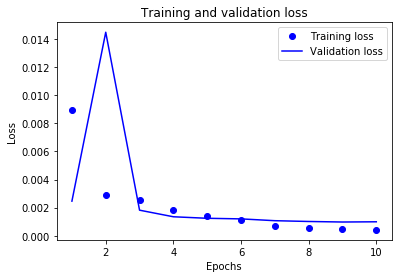

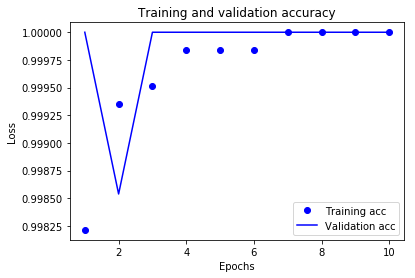


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 54s 9ms/step - loss: 4.4237e-04 - acc: 1.0000 - val_loss: 8.0134e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 47s 8ms/step - loss: 5.8170e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 4.1895e-04 - acc: 1.0000 - val_loss: 9.2224e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.9320e-04 - acc: 1.0000 - val_loss: 8.6086e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.6466e-04 - acc: 1.0000 - val_loss: 7.9317e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.4914e-04 - acc: 1.0000 - val_loss: 7.4575e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.0748e-04 -

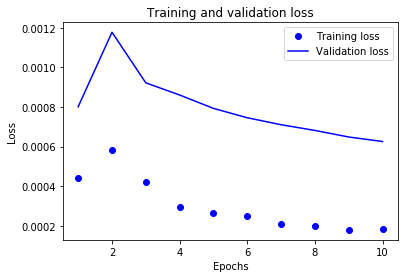

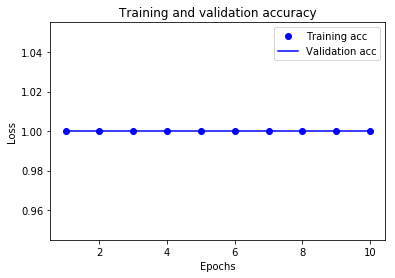


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.3963e-04 - acc: 1.0000 - val_loss: 1.2024e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.1453e-04 - acc: 1.0000 - val_loss: 1.1321e-04 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.7931e-04 - acc: 1.0000 - val_loss: 1.0708e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.5182e-04 - acc: 1.0000 - val_loss: 1.0162e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.3885e-04 - acc: 1.0000 - val_loss: 9.7040e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.2793e-04 - acc: 1.0000 - val_loss: 9.3715e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.1716e-

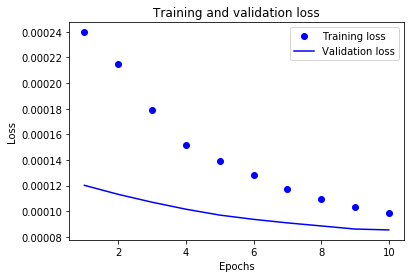

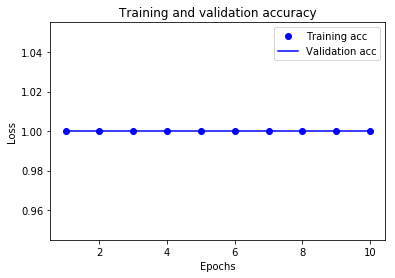


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 9.1780e-05 - acc: 1.0000 - val_loss: 7.3365e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 8.5523e-05 - acc: 1.0000 - val_loss: 7.0422e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 8.1519e-05 - acc: 1.0000 - val_loss: 6.8194e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 7.9119e-05 - acc: 1.0000 - val_loss: 6.5577e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 7.2440e-05 - acc: 1.0000 - val_loss: 6.3442e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44s 7ms/step - loss: 6.7741e-05 - acc: 1.0000 - val_loss: 6.1871e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 53s 9ms/step - loss: 6.5770e-

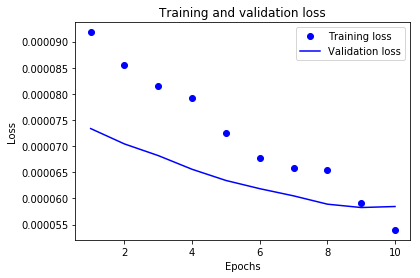

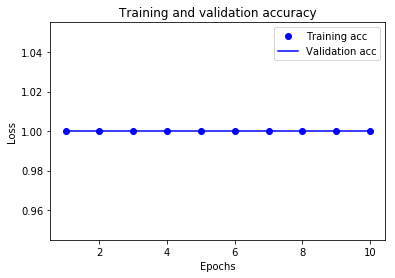


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 60s 10ms/step - loss: 5.6493e-05 - acc: 1.0000 - val_loss: 3.7411e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 46s 7ms/step - loss: 5.2999e-05 - acc: 1.0000 - val_loss: 3.5980e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 46s 8ms/step - loss: 5.2354e-05 - acc: 1.0000 - val_loss: 3.4874e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 47s 8ms/step - loss: 4.6978e-05 - acc: 1.0000 - val_loss: 3.3038e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 46s 7ms/step - loss: 4.4063e-05 - acc: 1.0000 - val_loss: 3.1735e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 48s 8ms/step - loss: 4.1803e-05 - acc: 1.0000 - val_loss: 3.0512e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 43s 7ms/step - loss: 3.9612e

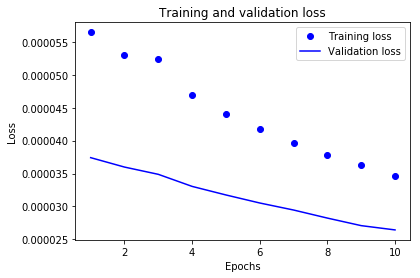

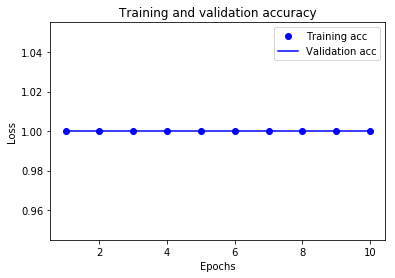


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 45s 7ms/step - loss: 3.3394e-05 - acc: 1.0000 - val_loss: 2.3495e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 3.1901e-05 - acc: 1.0000 - val_loss: 2.2837e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 47s 8ms/step - loss: 3.0398e-05 - acc: 1.0000 - val_loss: 2.2101e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 45s 7ms/step - loss: 2.9035e-05 - acc: 1.0000 - val_loss: 2.1367e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 49s 8ms/step - loss: 2.7782e-05 - acc: 1.0000 - val_loss: 2.0857e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 45s 7ms/step - loss: 2.6664e-05 - acc: 1.0000 - val_loss: 2.0277e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.5698e-

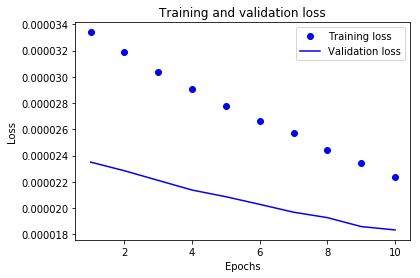

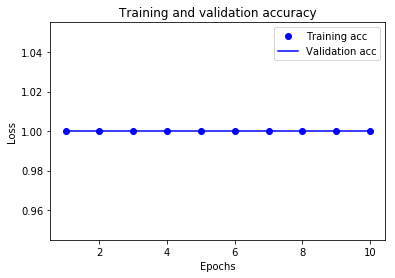


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 61s 10ms/step - loss: 2.0692e-05 - acc: 1.0000 - val_loss: 2.4128e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.9733e-05 - acc: 1.0000 - val_loss: 2.3621e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.8957e-05 - acc: 1.0000 - val_loss: 2.2989e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.8234e-05 - acc: 1.0000 - val_loss: 2.2392e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 52s 9ms/step - loss: 1.7461e-05 - acc: 1.0000 - val_loss: 2.2052e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.6807e-05 - acc: 1.0000 - val_loss: 2.1513e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.6153

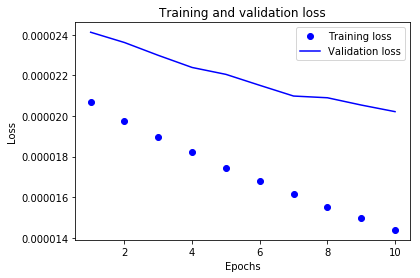

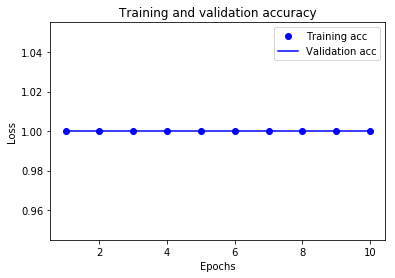

In [33]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#### Categorical Accuracy

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 404       
Total params: 2,139,304
Trainable params: 2,139,304
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 50s 8ms/step - loss: 0.0174 - categorical_accuracy: 0.9971 - val_loss: 0.0119 - val_categorical_accuracy: 0.9971
Epoch 2/10
6156/6156 [==============================] - 46s 7ms/step - loss: 0.0193 - categorical_accuracy: 0.9955 - val_loss: 0.0408 - val_categorical_accuracy: 0.9883
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.0183 - categorical_accuracy: 0.9956 - val_loss: 0.0194 - val_categorical_accuracy: 0.9927
Epoch 4/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.0033 - categorical_accuracy: 0.9992 - val_loss: 0.0363 - val_categorical_accuracy: 0.9927
Epoch 5/10
6156/6156 [==============================] - 43s 7ms/step - loss: 8.4661e-04 - categorical_accuracy: 0.9998 - val_loss: 0.0371 - val_categorical_accuracy: 0.9912
Epoch 6/10
6156/6156 [==============================] - 45s 7ms/step - loss: 4.0069e-04 - cate

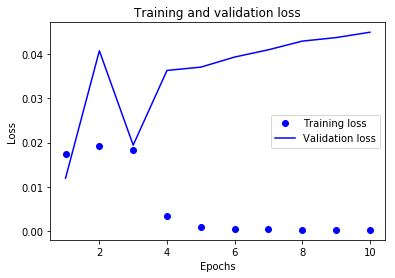

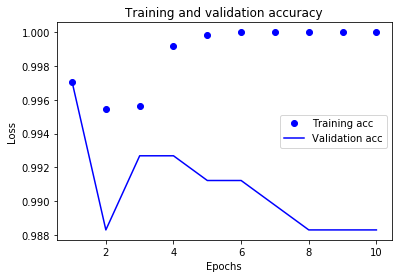


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.0100 - categorical_accuracy: 0.9979 - val_loss: 0.0013 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 0.0015 - categorical_accuracy: 0.9998 - val_loss: 4.6285e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.9370e-04 - categorical_accuracy: 1.0000 - val_loss: 4.5185e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.1668e-04 - categorical_accuracy: 1.0000 - val_loss: 4.1126e-04 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.8320e-04 - categorical_accuracy: 1.0000 - val_loss: 3.7218e-04 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 43s 7ms/step -

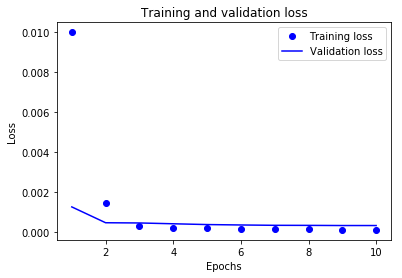

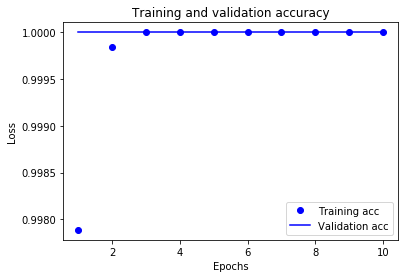


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.2410e-04 - categorical_accuracy: 1.0000 - val_loss: 6.1399e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 9.3777e-05 - categorical_accuracy: 1.0000 - val_loss: 5.7932e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 43s 7ms/step - loss: 8.4861e-05 - categorical_accuracy: 1.0000 - val_loss: 5.4766e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 7.8338e-05 - categorical_accuracy: 1.0000 - val_loss: 5.2001e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 7.2405e-05 - categorical_accuracy: 1.0000 - val_loss: 5.0890e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44

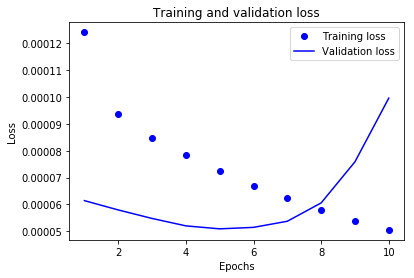

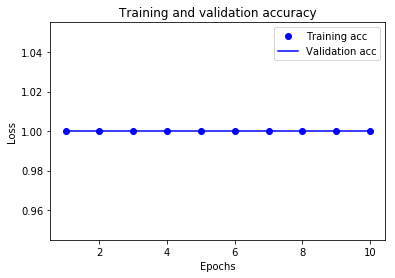


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 6.0967e-05 - categorical_accuracy: 1.0000 - val_loss: 4.1073e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 43s 7ms/step - loss: 5.3635e-05 - categorical_accuracy: 1.0000 - val_loss: 3.6059e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 45s 7ms/step - loss: 4.6682e-05 - categorical_accuracy: 1.0000 - val_loss: 3.3680e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 4.3206e-05 - categorical_accuracy: 1.0000 - val_loss: 3.1878e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 43s 7ms/step - loss: 4.0020e-05 - categorical_accuracy: 1.0000 - val_loss: 3.0335e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44

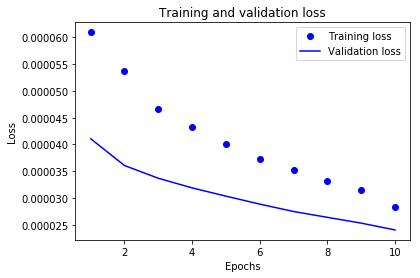

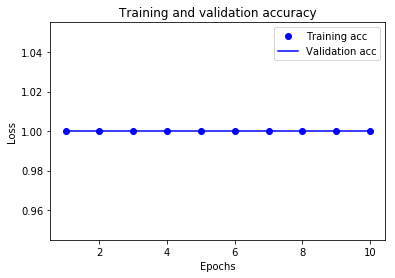


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.4636e-05 - categorical_accuracy: 1.0000 - val_loss: 5.4031e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 43s 7ms/step - loss: 2.3298e-05 - categorical_accuracy: 1.0000 - val_loss: 5.3452e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.1846e-05 - categorical_accuracy: 1.0000 - val_loss: 5.2616e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.0847e-05 - categorical_accuracy: 1.0000 - val_loss: 5.2032e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.9888e-05 - categorical_accuracy: 1.0000 - val_loss: 5.1088e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 43

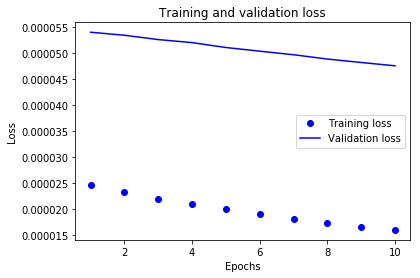

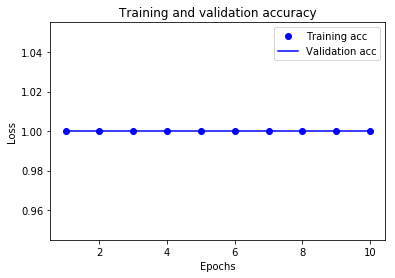


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.9060e-05 - categorical_accuracy: 1.0000 - val_loss: 1.1631e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.8271e-05 - categorical_accuracy: 1.0000 - val_loss: 1.1197e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.7195e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0815e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.6284e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0414e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 50s 8ms/step - loss: 1.5639e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0040e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 66

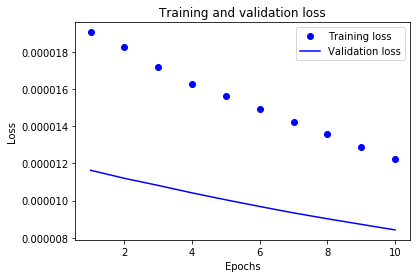

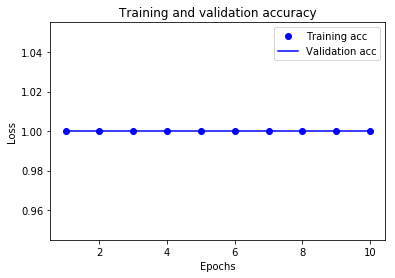


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.1808e-05 - categorical_accuracy: 1.0000 - val_loss: 8.6506e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 45s 7ms/step - loss: 1.1318e-05 - categorical_accuracy: 1.0000 - val_loss: 8.3721e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 46s 7ms/step - loss: 1.0857e-05 - categorical_accuracy: 1.0000 - val_loss: 8.0803e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 1.0266e-05 - categorical_accuracy: 1.0000 - val_loss: 7.8296e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 1.0015e-05 - categorical_accuracy: 1.0000 - val_loss: 7.5518e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44

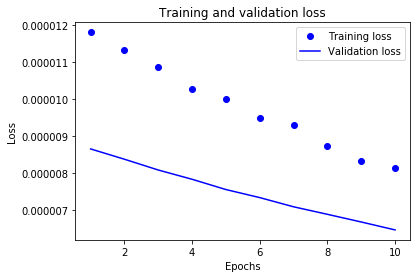

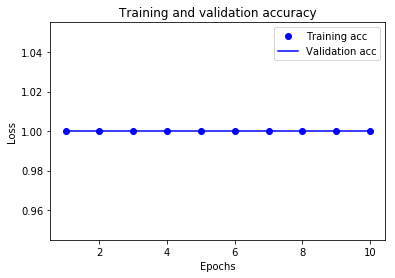


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 7.8641e-06 - categorical_accuracy: 1.0000 - val_loss: 5.5488e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 7.4904e-06 - categorical_accuracy: 1.0000 - val_loss: 5.3675e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 45s 7ms/step - loss: 7.1920e-06 - categorical_accuracy: 1.0000 - val_loss: 5.1919e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 43s 7ms/step - loss: 6.9903e-06 - categorical_accuracy: 1.0000 - val_loss: 5.0177e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 6.6345e-06 - categorical_accuracy: 1.0000 - val_loss: 4.8678e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44

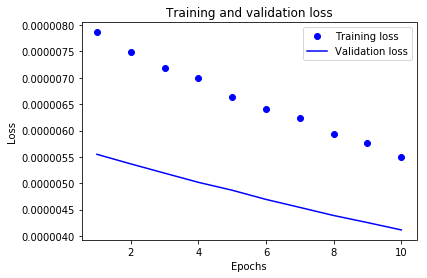

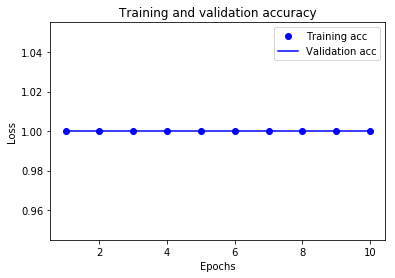


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 44s 7ms/step - loss: 5.3896e-06 - categorical_accuracy: 1.0000 - val_loss: 3.5994e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 44s 7ms/step - loss: 5.2011e-06 - categorical_accuracy: 1.0000 - val_loss: 3.4708e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 43s 7ms/step - loss: 5.0131e-06 - categorical_accuracy: 1.0000 - val_loss: 3.3610e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 45s 7ms/step - loss: 4.8203e-06 - categorical_accuracy: 1.0000 - val_loss: 3.2525e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 4.6126e-06 - categorical_accuracy: 1.0000 - val_loss: 3.1565e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 44

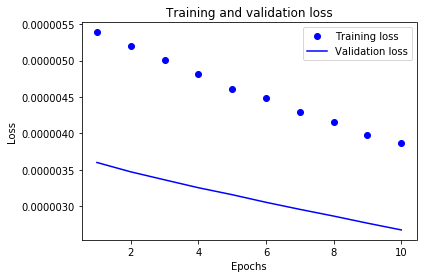

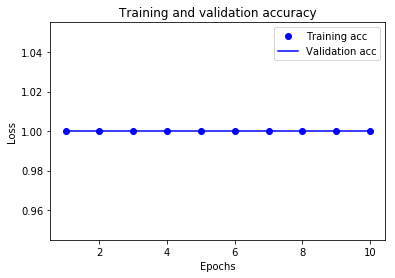


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 43s 7ms/step - loss: 3.3538e-06 - categorical_accuracy: 1.0000 - val_loss: 5.5325e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 53s 9ms/step - loss: 3.2348e-06 - categorical_accuracy: 1.0000 - val_loss: 5.4511e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 44s 7ms/step - loss: 3.1252e-06 - categorical_accuracy: 1.0000 - val_loss: 5.3924e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 46s 8ms/step - loss: 3.0167e-06 - categorical_accuracy: 1.0000 - val_loss: 5.3234e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 44s 7ms/step - loss: 2.9096e-06 - categorical_accuracy: 1.0000 - val_loss: 5.2780e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 4

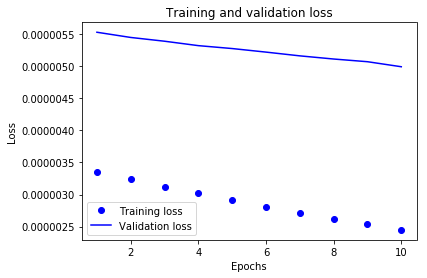

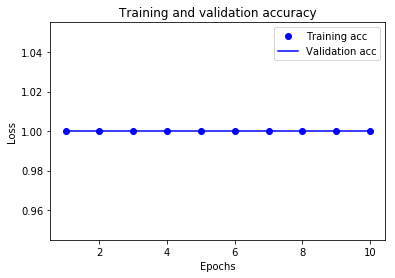

In [35]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Model 3

In [36]:
model = Sequential()
model.add(Embedding(vocab_len, 100, input_length=100))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100,recurrent_dropout=0.1))
model.add(Dense(4, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Accuracy

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 404       
Total params: 2,139,304
Trainable params: 2,139,304
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 1.3401 - acc: 0.3834 - val_loss: 1.1594 - val_acc: 0.4371
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.7539 - acc: 0.7094 - val_loss: 0.6525 - val_acc: 0.8012
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.4232 - acc: 0.8650 - val_loss: 0.4890 - val_acc: 0.8655
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.2742 - acc: 0.9105 - val_loss: 0.4285 - val_acc: 0.8860
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.1800 - acc: 0.9430 - val_loss: 0.4524 - val_acc: 0.8699
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.1333 - acc: 0.9586 - val_loss: 0.4707 - val_acc: 0.8684
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0870 - acc: 0.9724 - val_loss: 0.4717 - val_acc: 0.874

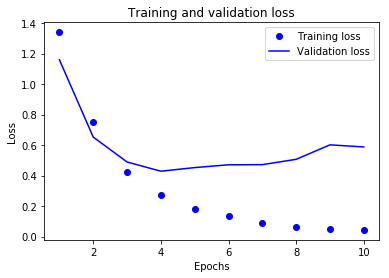

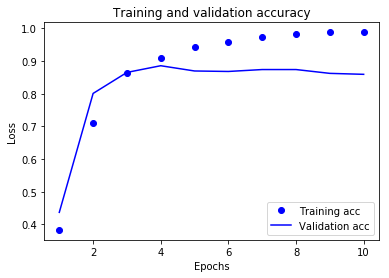


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.1036 - acc: 0.9764 - val_loss: 0.0367 - val_acc: 0.9956
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0523 - acc: 0.9877 - val_loss: 0.0416 - val_acc: 0.9898
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0364 - acc: 0.9912 - val_loss: 0.0445 - val_acc: 0.9883
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0235 - acc: 0.9946 - val_loss: 0.0361 - val_acc: 0.9883
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0175 - acc: 0.9969 - val_loss: 0.0335 - val_acc: 0.9883
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0131 - acc: 0.9974 - val_loss: 0.0372 - val_acc: 0.9868
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0107 - acc: 0.9969 - val_loss: 0.0454 - val_acc: 0.985

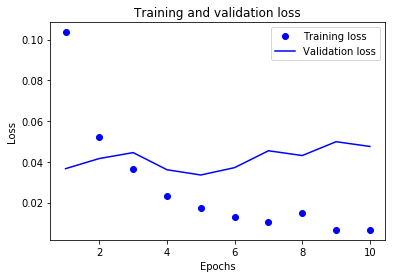

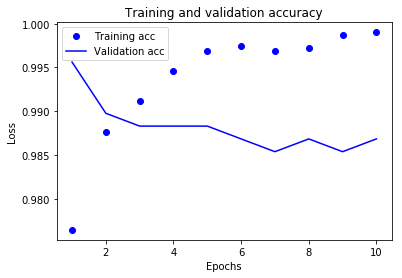


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0174 - acc: 0.9958 - val_loss: 0.0078 - val_acc: 0.9971
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0084 - acc: 0.9981 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0108 - acc: 0.9974 - val_loss: 0.0087 - val_acc: 0.9985
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0046 - acc: 0.9990 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 18s 3ms/step - loss: 0.0082 - acc: 0.9987 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0044 - acc: 0.9994 - val_loss: 0.0040 - val_acc: 0.998

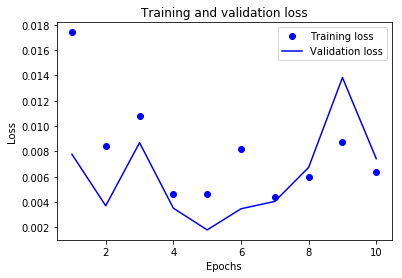

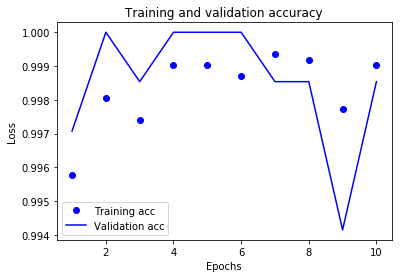


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0027 - val_acc: 0.9985
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0064 - acc: 0.9977 - val_loss: 0.0023 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 18s 3ms/step - loss: 0.0042 - acc: 0.9992 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0045 - acc: 0.9990 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.0023 - val_acc: 0.9985
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.0055 - val_acc: 0.9971
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0023 - acc: 0.9998 - val_loss: 0.0101 - val_acc: 0.995

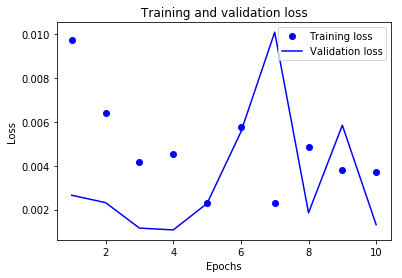

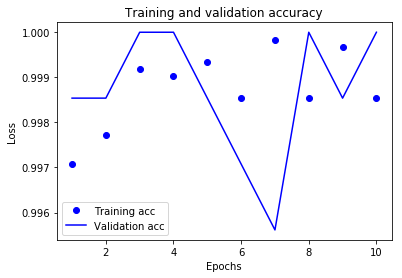


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0050 - acc: 0.9987 - val_loss: 7.0423e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0074 - acc: 0.9984 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0070 - acc: 0.9990 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0037 - acc: 0.9994 - val_loss: 0.0118 - val_acc: 0.9956
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 18s 3ms/step - loss: 0.0105 - acc: 0.9971 - val_loss: 0.0019 - val_acc: 1

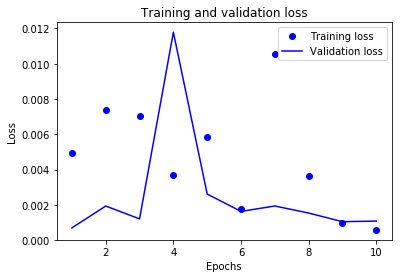

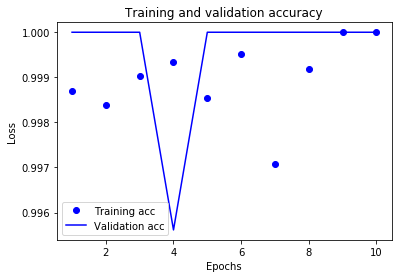


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 6.9827e-04 - acc: 1.0000 - val_loss: 1.0325e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0079 - acc: 0.9981 - val_loss: 5.9333e-04 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 9.3037e-04 - acc: 0.9998 - val_loss: 1.4033e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 18s 3ms/step - loss: 0.0014 - acc: 0.9997 - val_loss: 1.3200e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 2.6482e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.0062 - val_acc: 0.9985
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0019 - acc: 0.9997 - val_l

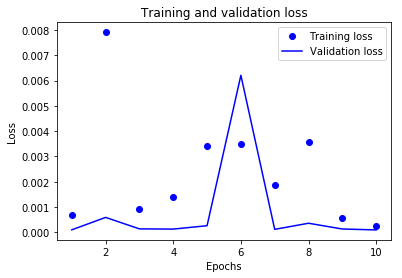

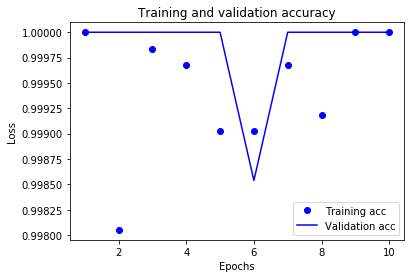


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.0777e-04 - acc: 1.0000 - val_loss: 6.4162e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0015 - acc: 0.9995 - val_loss: 6.5955e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.6078e-04 - acc: 1.0000 - val_loss: 6.6596e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.0245e-04 - acc: 1.0000 - val_loss: 5.0155e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.9649e-04 - acc: 1.0000 - val_loss: 4.1754e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0024 - acc: 0.9992 - val_loss: 8.4540e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0020 - acc: 0.

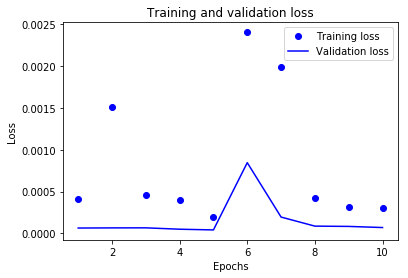

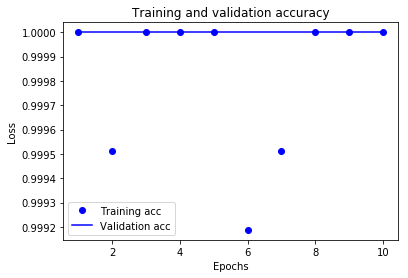


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.1026e-04 - acc: 1.0000 - val_loss: 3.6434e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.4918e-04 - acc: 1.0000 - val_loss: 2.8362e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 7.8183e-04 - acc: 0.9997 - val_loss: 2.9143e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 5.7594e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0091 - acc: 0.9984 - val_loss: 8.8899e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0051 - acc: 0.9990 - val_loss: 4.4273e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0035 - acc: 0.9985

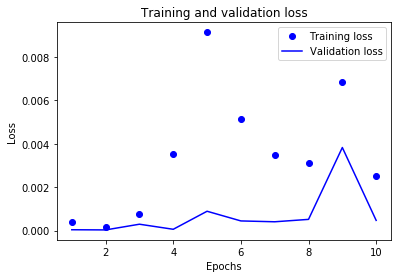

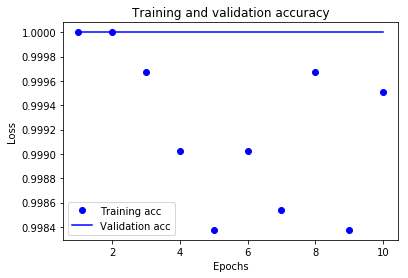


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 1.7072e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 8.3517e-04 - acc: 0.9998 - val_loss: 1.5492e-04 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0103 - acc: 0.9974 - val_loss: 7.4192e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0030 - acc: 0.9992 - val_loss: 3.6695e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 18s 3ms/step - loss: 0.0022 - acc: 0.9994 - val_loss: 2.5476e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0039 - acc: 0.9985 - val_loss: 4.9542e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0020 - acc: 0.9992 - val_l

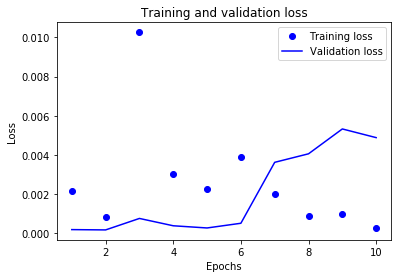

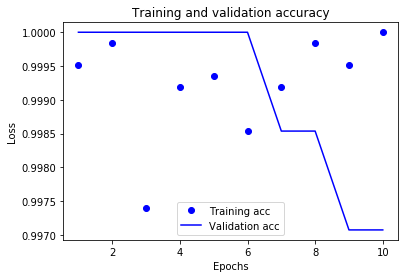


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0038 - acc: 0.9994 - val_loss: 1.7818e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0027 - acc: 0.9994 - val_loss: 3.3212e-04 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.5023e-04 - acc: 1.0000 - val_loss: 1.1999e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 18s 3ms/step - loss: 2.6615e-04 - acc: 1.0000 - val_loss: 8.6953e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.8631e-04 - acc: 1.0000 - val_loss: 2.0039e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.1505e-04 - acc: 1.0000 - val_loss: 1.7583e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.5861e-04 - ac

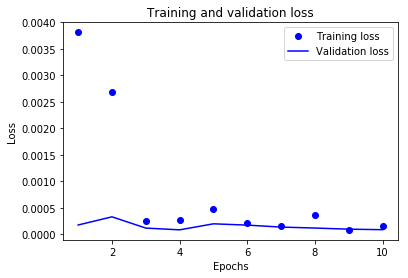

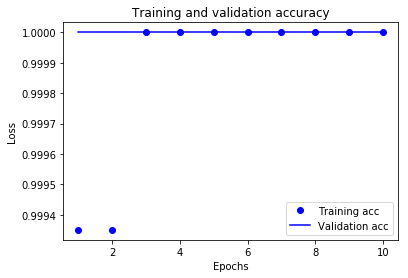

In [38]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#### Categorical Accuracy

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 404       
Total params: 2,139,304
Trainable params: 2,139,304
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.0012 - categorical_accuracy: 0.9997 - val_loss: 9.1128e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 6.6416e-04 - categorical_accuracy: 0.9998 - val_loss: 1.3084e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.0695e-04 - categorical_accuracy: 1.0000 - val_loss: 6.7390e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 3.2131e-05 - categorical_accuracy: 1.0000 - val_loss: 5.2203e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 3.3819e-05 - categorical_accuracy: 1.0000 - val_loss: 3.2357e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3m

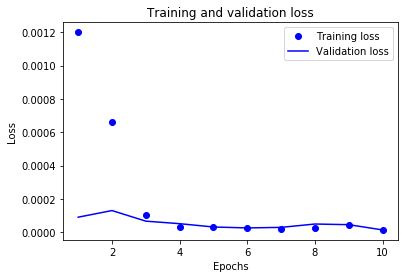

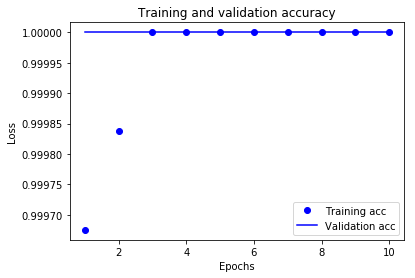


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.6152e-04 - categorical_accuracy: 1.0000 - val_loss: 2.0448e-04 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0065 - categorical_accuracy: 0.9985 - val_loss: 4.4630e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0177 - categorical_accuracy: 0.9955 - val_loss: 0.0081 - val_categorical_accuracy: 0.9971
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0049 - categorical_accuracy: 0.9987 - val_loss: 0.0056 - val_categorical_accuracy: 0.9985
Epoch 5/10
6156/6156 [==============================] - 18s 3ms/step - loss: 0.0011 - categorical_accuracy: 0.9997 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0027 - 

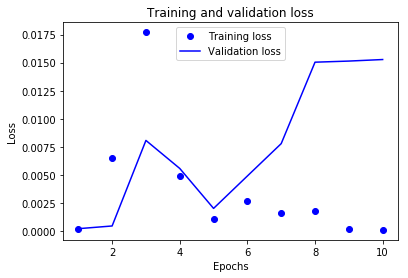

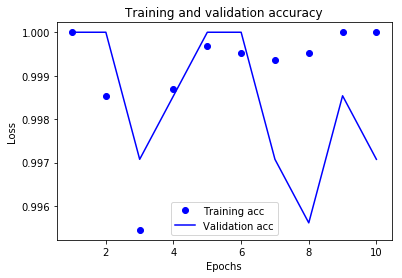


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0056 - categorical_accuracy: 0.9987 - val_loss: 4.7078e-04 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 0.0017 - categorical_accuracy: 0.9992 - val_loss: 3.7427e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.4916e-04 - categorical_accuracy: 0.9998 - val_loss: 1.1373e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.3729e-04 - categorical_accuracy: 1.0000 - val_loss: 7.3168e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.1575e-04 - categorical_accuracy: 0.9998 - val_loss: 1.4415e-04 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17s 3ms/st

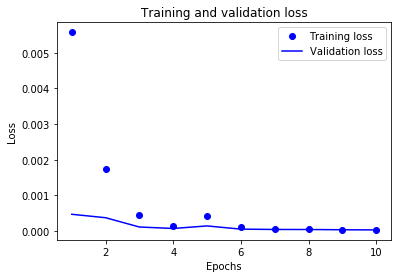

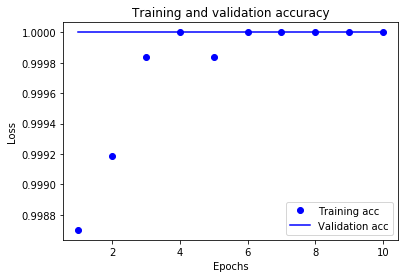


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.0867e-04 - categorical_accuracy: 1.0000 - val_loss: 9.1559e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.4529e-05 - categorical_accuracy: 1.0000 - val_loss: 6.1047e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.6412e-05 - categorical_accuracy: 1.0000 - val_loss: 4.3062e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.7200e-05 - categorical_accuracy: 1.0000 - val_loss: 3.5831e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.4272e-05 - categorical_accuracy: 1.0000 - val_loss: 3.0701e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 18

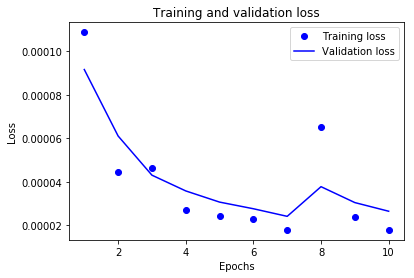

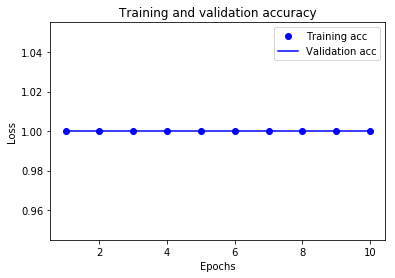


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.6618e-05 - categorical_accuracy: 1.0000 - val_loss: 7.1570e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.6874e-05 - categorical_accuracy: 1.0000 - val_loss: 6.5183e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 18s 3ms/step - loss: 1.3119e-05 - categorical_accuracy: 1.0000 - val_loss: 5.8731e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.3926e-05 - categorical_accuracy: 1.0000 - val_loss: 5.5931e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 1.3868e-05 - categorical_accuracy: 1.0000 - val_loss: 5.6965e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17

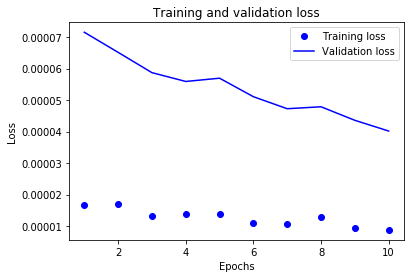

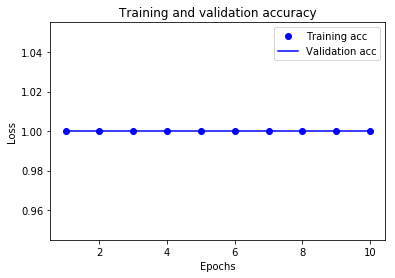


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 9.8935e-06 - categorical_accuracy: 1.0000 - val_loss: 7.5108e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 8.5996e-06 - categorical_accuracy: 1.0000 - val_loss: 7.0735e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 7.2456e-06 - categorical_accuracy: 1.0000 - val_loss: 6.7849e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 6.9899e-06 - categorical_accuracy: 1.0000 - val_loss: 6.4852e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 7.3677e-06 - categorical_accuracy: 1.0000 - val_loss: 6.1778e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17

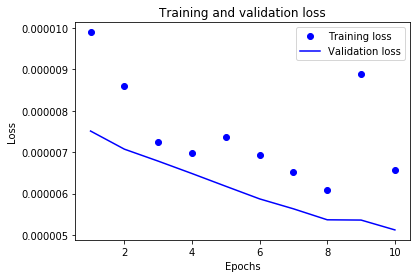

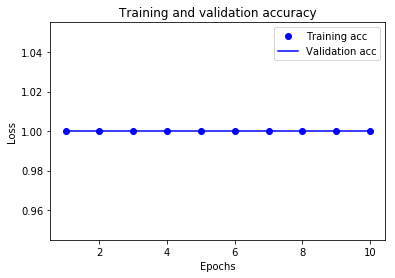


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 23s 4ms/step - loss: 6.1420e-06 - categorical_accuracy: 1.0000 - val_loss: 5.5030e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 6.7730e-06 - categorical_accuracy: 1.0000 - val_loss: 5.2377e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 18s 3ms/step - loss: 5.3048e-06 - categorical_accuracy: 1.0000 - val_loss: 4.9489e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.7455e-06 - categorical_accuracy: 1.0000 - val_loss: 4.7605e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 18s 3ms/step - loss: 8.3598e-05 - categorical_accuracy: 1.0000 - val_loss: 1.1071e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17

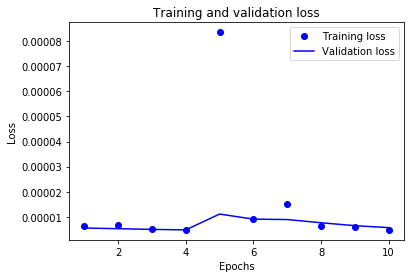

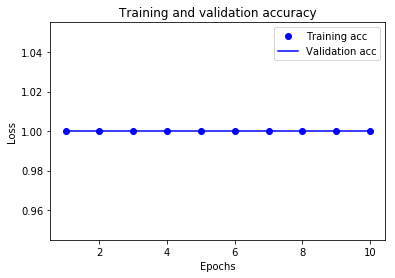


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 5.2050e-06 - categorical_accuracy: 1.0000 - val_loss: 4.8965e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.6044e-06 - categorical_accuracy: 1.0000 - val_loss: 4.4753e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 4.3023e-06 - categorical_accuracy: 1.0000 - val_loss: 4.2462e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 3.4957e-05 - categorical_accuracy: 1.0000 - val_loss: 7.0412e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 5.6935e-06 - categorical_accuracy: 1.0000 - val_loss: 5.4762e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 18

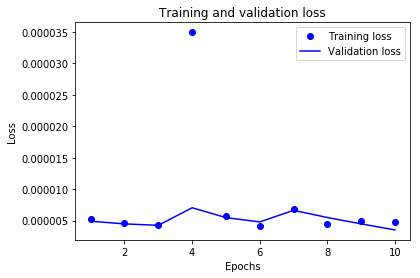

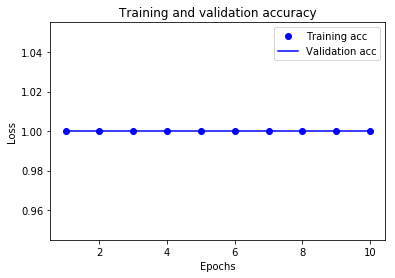


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 3.2187e-06 - categorical_accuracy: 1.0000 - val_loss: 2.4776e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 8.3462e-06 - categorical_accuracy: 1.0000 - val_loss: 3.8250e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 7.4654e-06 - categorical_accuracy: 1.0000 - val_loss: 6.1253e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 5.6204e-06 - categorical_accuracy: 1.0000 - val_loss: 3.9200e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 3.9733e-06 - categorical_accuracy: 1.0000 - val_loss: 2.9917e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 17

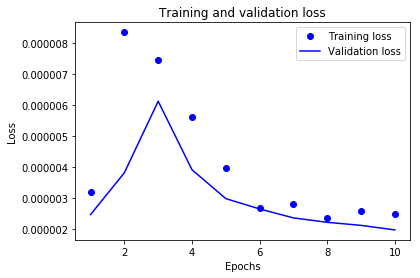

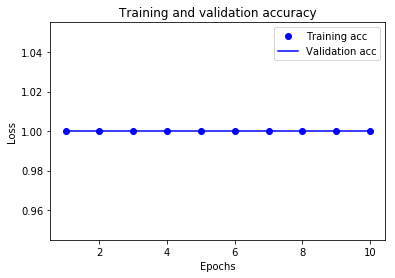


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.3062e-06 - categorical_accuracy: 1.0000 - val_loss: 3.6927e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 17s 3ms/step - loss: 3.6957e-06 - categorical_accuracy: 1.0000 - val_loss: 3.9464e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.5528e-06 - categorical_accuracy: 1.0000 - val_loss: 3.5072e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 17s 3ms/step - loss: 2.5011e-06 - categorical_accuracy: 1.0000 - val_loss: 3.2956e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 17s 3ms/step - loss: 6.3240e-06 - categorical_accuracy: 1.0000 - val_loss: 2.0431e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 1

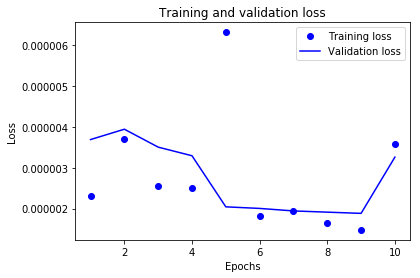

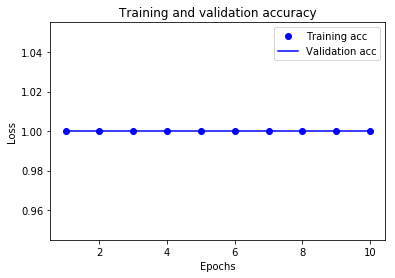

In [40]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Convolved Models

# Model 4

In [41]:
model = Sequential()
model.add(Embedding(vocab_len,100, input_length=100))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(120))
model.add(Dense(4, activation='sigmoid'))

#### Accuracy

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               88800     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 484       
Total params: 2,179,848
Trainable params: 2,179,848
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 36s 6ms/step - loss: 1.2406 - acc: 0.4807 - val_loss: 0.7388 - val_acc: 0.7061
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.5369 - acc: 0.7797 - val_loss: 0.4493 - val_acc: 0.8465
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2498 - acc: 0.9162 - val_loss: 0.4384 - val_acc: 0.8538
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.1417 - acc: 0.9552 - val_loss: 0.4211 - val_acc: 0.8640
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0773 - acc: 0.9777 - val_loss: 0.5365 - val_acc: 0.8582
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0415 - acc: 0.9894 - val_loss: 0.5840 - val_acc: 0.8509
Epoch 7/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0329 - acc: 0.9919 - val_loss: 0.6507 - val_acc: 0.846

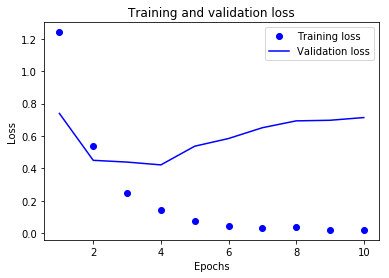

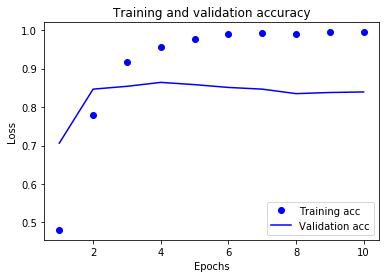


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.1006 - acc: 0.9743 - val_loss: 0.0368 - val_acc: 0.9898
Epoch 2/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0404 - acc: 0.9898 - val_loss: 0.0351 - val_acc: 0.9868
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0149 - acc: 0.9969 - val_loss: 0.0502 - val_acc: 0.9839
Epoch 4/10
6156/6156 [==============================] - 35s 6ms/step - loss: 0.0111 - acc: 0.9981 - val_loss: 0.0524 - val_acc: 0.9883
Epoch 5/10
6156/6156 [==============================] - 39s 6ms/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.0567 - val_acc: 0.9825
Epoch 6/10
6156/6156 [==============================] - 34s 6ms/step - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0531 - val_acc: 0.9825
Epoch 7/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.0529 - val_acc: 0.986

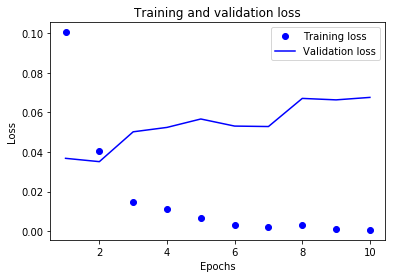

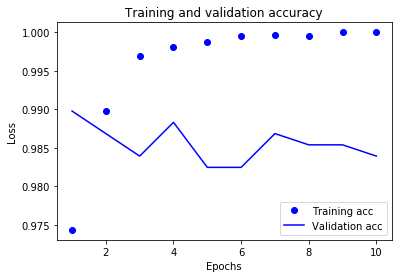


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0235 - acc: 0.9937 - val_loss: 0.0136 - val_acc: 0.9942
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0108 - acc: 0.9974 - val_loss: 0.0084 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0072 - acc: 0.9981 - val_loss: 0.0094 - val_acc: 0.9956
Epoch 4/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0069 - acc: 0.9984 - val_loss: 0.0161 - val_acc: 0.9927
Epoch 5/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0059 - acc: 0.9984 - val_loss: 0.0057 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0030 - acc: 0.9989 - val_loss: 0.0096 - val_acc: 0.9956
Epoch 7/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.0087 - val_acc: 0.997

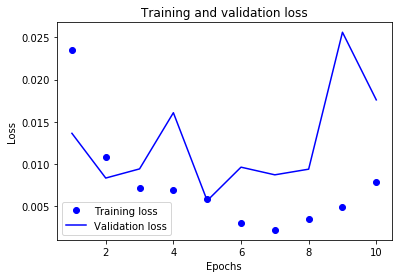

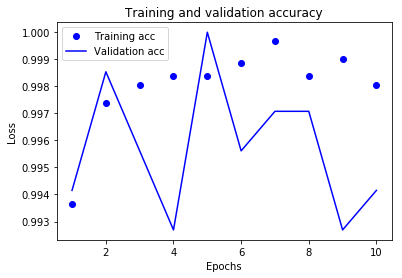


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0094 - acc: 0.9971 - val_loss: 0.0056 - val_acc: 0.9985
Epoch 2/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0076 - acc: 0.9979 - val_loss: 0.0110 - val_acc: 0.9971
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0080 - val_acc: 0.9971
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0101 - acc: 0.9981 - val_loss: 0.0470 - val_acc: 0.9854
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0084 - val_acc: 0.9956
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0032 - acc: 0.9997 - val_loss: 0.0077 - val_acc: 0.9985
Epoch 7/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0124 - val_acc: 0.997

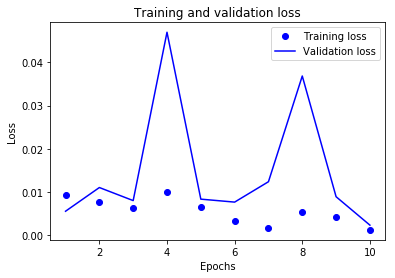

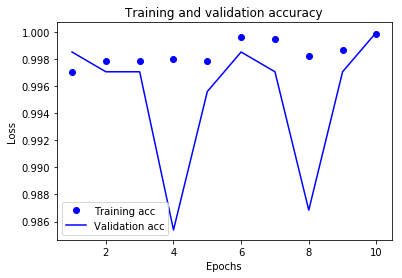


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0041 - acc: 0.9985 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0061 - acc: 0.9976 - val_loss: 0.0075 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0072 - val_acc: 0.9971
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0071 - acc: 0.9976 - val_loss: 0.0218 - val_acc: 0.9942
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0079 - acc: 0.9972 - val_loss: 0.0147 - val_acc: 0.9942
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0071 - acc: 0.9984 - val_loss: 0.0260 - val_acc: 0.9927
Epoch 7/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0031 - acc: 0.9992 - val_loss: 0.0181 - val_acc: 0.994

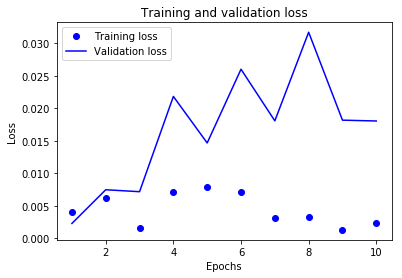

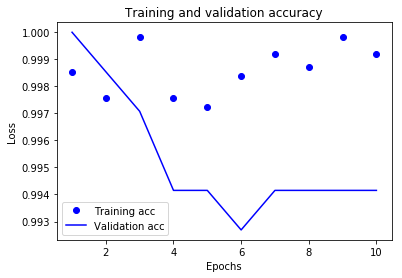


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 7.8398e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 28s 4ms/step - loss: 5.3250e-04 - acc: 1.0000 - val_loss: 3.0415e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 28s 4ms/step - loss: 3.8693e-04 - acc: 1.0000 - val_loss: 2.7093e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 3.5539e-04 - acc: 1.0000 - val_loss: 2.9937e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 2.9488e-04 - acc: 1.0000 - val_loss: 2.7793e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 29s 5ms/step - loss: 2.7736e-04 - acc: 1.

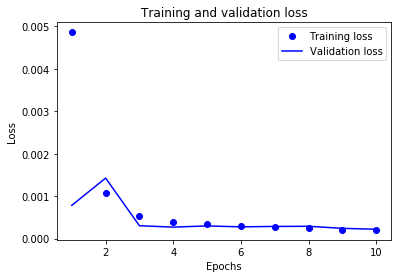

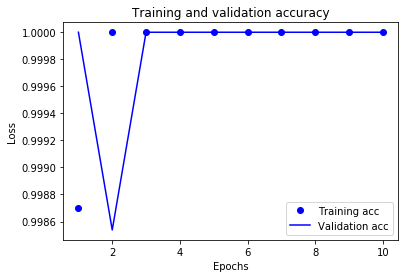


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 2.1743e-04 - acc: 1.0000 - val_loss: 6.4057e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.4007e-04 - acc: 1.0000 - val_loss: 5.9274e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.0072e-04 - acc: 1.0000 - val_loss: 5.5618e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 28s 4ms/step - loss: 9.5805e-05 - acc: 1.0000 - val_loss: 5.1721e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 8.9947e-05 - acc: 1.0000 - val_loss: 4.8536e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 28s 4ms/step - loss: 2.0703e-04 - acc: 1.0000 - val_loss: 4.7113e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 27s 4ms/step - loss: 8.8897e-

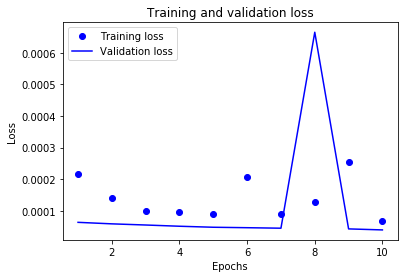

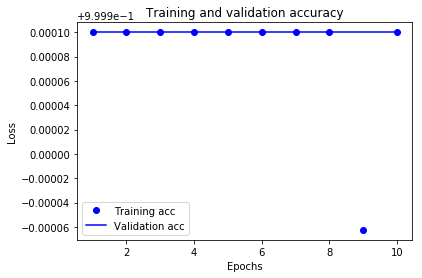


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 5.6454e-05 - acc: 1.0000 - val_loss: 3.1012e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 27s 4ms/step - loss: 6.5424e-05 - acc: 1.0000 - val_loss: 2.9035e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 6.4268e-05 - acc: 1.0000 - val_loss: 2.7490e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 28s 5ms/step - loss: 5.7130e-05 - acc: 1.0000 - val_loss: 2.6676e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 3.0976e-04 - acc: 0.9998 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0072 - acc: 0.9981 - val_loss: 0.0028 - val_acc: 0.9985
Epoch 7/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0046 - acc: 0.9985

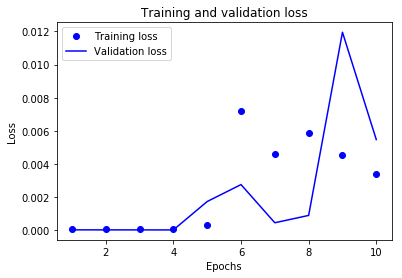

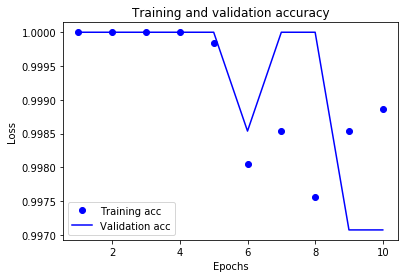


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 34s 6ms/step - loss: 0.0201 - acc: 0.9929 - val_loss: 0.0210 - val_acc: 0.9912
Epoch 2/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0189 - val_acc: 0.9942
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0072 - acc: 0.9981 - val_loss: 0.0140 - val_acc: 0.9927
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0187 - val_acc: 0.9927
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 3.7370e-04 - acc: 1.0000 - val_loss: 0.0189 - val_acc: 0.9942
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 2.7185e-04 - acc: 1.0000 - val_loss: 0.0183 - val_acc: 0.9942
Epoch 7/10
6156/6156 [==============================] - 28s 4ms/step - loss: 2.4210e-04 - acc: 1.0000 - val_loss: 0.0193 - va

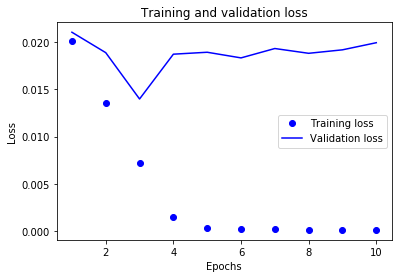

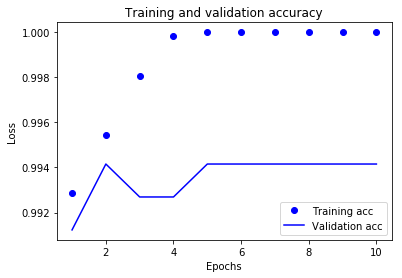


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0055 - acc: 0.9985 - val_loss: 4.2642e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 27s 4ms/step - loss: 7.0347e-04 - acc: 0.9998 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 2.2820e-04 - acc: 1.0000 - val_loss: 1.8177e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.3026e-04 - acc: 1.0000 - val_loss: 1.5051e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 1.1094e-04 - acc: 1.0000 - val_loss: 1.3653e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 9.4867e-05 - acc: 1.0000 - val_loss: 1.2393e-04 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 28s 4ms/step - loss: 4.3900e-04 - ac

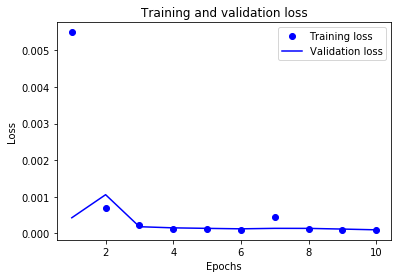

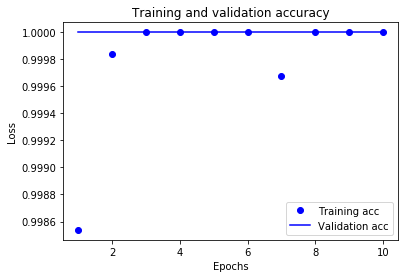

In [43]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#### Categorical Accuracy

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               88800     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 484       
Total params: 2,179,848
Trainable params: 2,179,848
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 40s 7ms/step - loss: 3.8574e-04 - categorical_accuracy: 0.9998 - val_loss: 1.8153e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 37s 6ms/step - loss: 1.6534e-04 - categorical_accuracy: 1.0000 - val_loss: 1.9615e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 4.0454e-05 - categorical_accuracy: 1.0000 - val_loss: 5.1073e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.6027e-05 - categorical_accuracy: 1.0000 - val_loss: 8.7147e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 9.5727e-06 - categorical_accuracy: 1.0000 - val_loss: 1.0210e-04 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 27

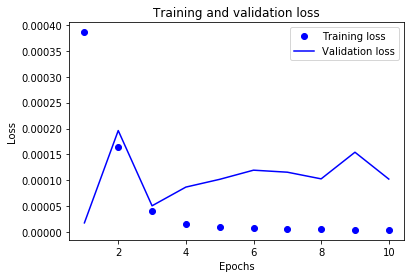

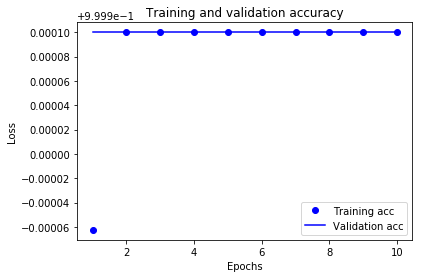


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0114 - categorical_accuracy: 0.9976 - val_loss: 0.0145 - val_categorical_accuracy: 0.9956
Epoch 2/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0132 - categorical_accuracy: 0.9959 - val_loss: 0.0244 - val_categorical_accuracy: 0.9883
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0046 - categorical_accuracy: 0.9990 - val_loss: 0.0365 - val_categorical_accuracy: 0.9868
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0043 - categorical_accuracy: 0.9985 - val_loss: 0.0431 - val_categorical_accuracy: 0.9810
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0034 - categorical_accuracy: 0.9990 - val_loss: 0.0609 - val_categorical_accuracy: 0.9795
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 2.9156e-04 - categori

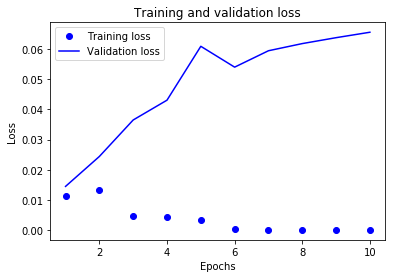

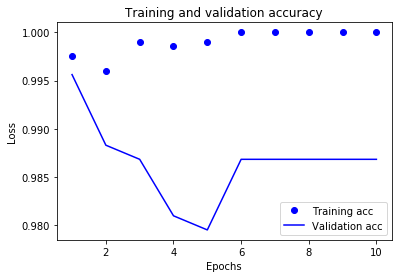


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0121 - categorical_accuracy: 0.9964 - val_loss: 8.2818e-04 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 34s 5ms/step - loss: 0.0047 - categorical_accuracy: 0.9985 - val_loss: 3.3996e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 34s 6ms/step - loss: 0.0011 - categorical_accuracy: 0.9997 - val_loss: 3.9860e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 32s 5ms/step - loss: 1.8384e-04 - categorical_accuracy: 1.0000 - val_loss: 2.4537e-04 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.0660e-04 - categorical_accuracy: 1.0000 - val_loss: 2.1797e-04 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step -

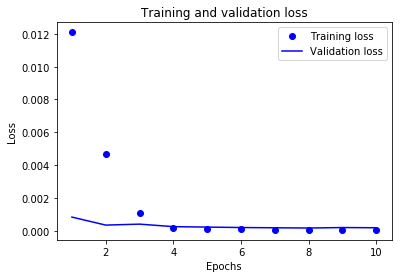

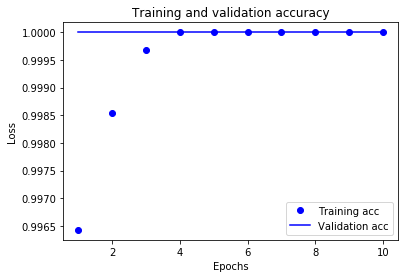


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 5.0473e-05 - categorical_accuracy: 1.0000 - val_loss: 3.0672e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 5.0490e-05 - categorical_accuracy: 1.0000 - val_loss: 2.8159e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 3.5309e-05 - categorical_accuracy: 1.0000 - val_loss: 2.6162e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 3.5052e-05 - categorical_accuracy: 1.0000 - val_loss: 2.4287e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 3.1127e-05 - categorical_accuracy: 1.0000 - val_loss: 2.2648e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 29

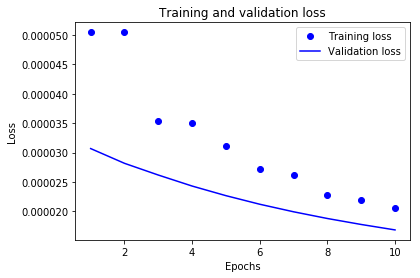

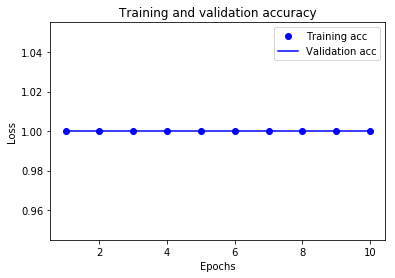


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 4ms/step - loss: 1.8738e-05 - categorical_accuracy: 1.0000 - val_loss: 2.1588e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.8093e-05 - categorical_accuracy: 1.0000 - val_loss: 2.0683e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.6585e-05 - categorical_accuracy: 1.0000 - val_loss: 1.9825e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.5954e-05 - categorical_accuracy: 1.0000 - val_loss: 1.9004e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 1.4570e-05 - categorical_accuracy: 1.0000 - val_loss: 1.8227e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 27

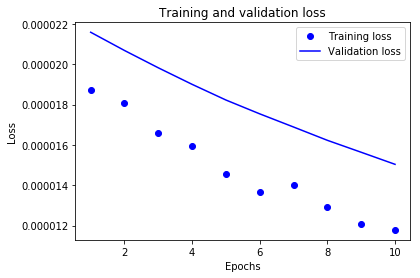

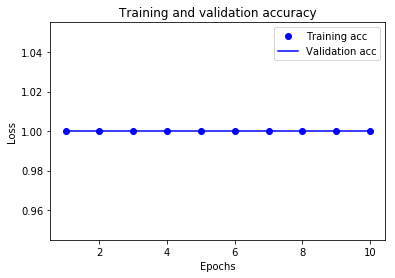


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.1909e-05 - categorical_accuracy: 1.0000 - val_loss: 8.7155e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.0829e-05 - categorical_accuracy: 1.0000 - val_loss: 8.3523e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 1.1033e-05 - categorical_accuracy: 1.0000 - val_loss: 8.0065e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 1.0095e-05 - categorical_accuracy: 1.0000 - val_loss: 7.6703e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 9.5036e-06 - categorical_accuracy: 1.0000 - val_loss: 7.3729e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 29

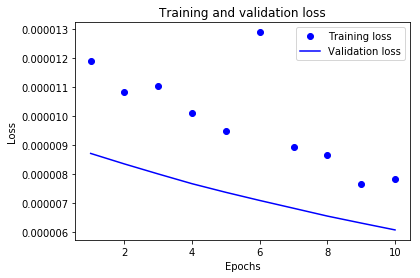

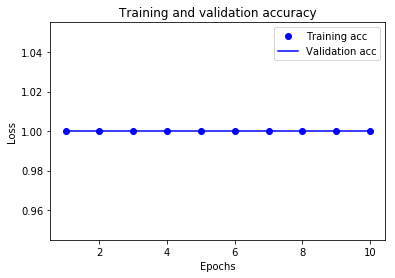


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 31s 5ms/step - loss: 7.9234e-06 - categorical_accuracy: 1.0000 - val_loss: 6.1833e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 7.1891e-06 - categorical_accuracy: 1.0000 - val_loss: 5.9479e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 6.9288e-06 - categorical_accuracy: 1.0000 - val_loss: 5.7310e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 32s 5ms/step - loss: 6.4728e-06 - categorical_accuracy: 1.0000 - val_loss: 5.5273e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 36s 6ms/step - loss: 6.0907e-06 - categorical_accuracy: 1.0000 - val_loss: 5.3293e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 43

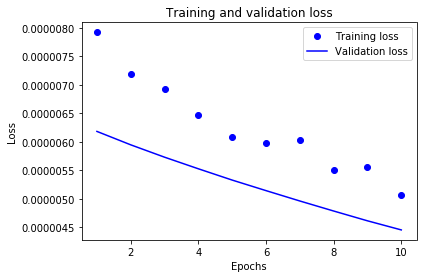

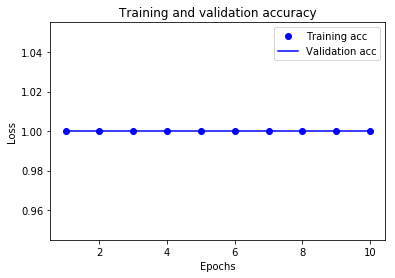


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 37s 6ms/step - loss: 5.0312e-06 - categorical_accuracy: 1.0000 - val_loss: 3.9306e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 32s 5ms/step - loss: 4.7108e-06 - categorical_accuracy: 1.0000 - val_loss: 3.8027e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 30s 5ms/step - loss: 4.6163e-06 - categorical_accuracy: 1.0000 - val_loss: 3.6745e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 32s 5ms/step - loss: 4.4664e-06 - categorical_accuracy: 1.0000 - val_loss: 3.5536e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 4.2539e-06 - categorical_accuracy: 1.0000 - val_loss: 3.4275e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 33

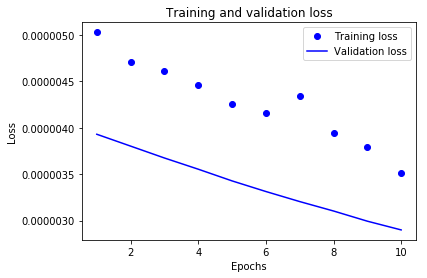

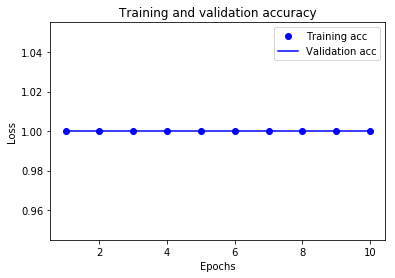


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 4ms/step - loss: 3.4895e-06 - categorical_accuracy: 1.0000 - val_loss: 2.5138e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 32s 5ms/step - loss: 3.2563e-06 - categorical_accuracy: 1.0000 - val_loss: 2.4325e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 33s 5ms/step - loss: 3.1996e-06 - categorical_accuracy: 1.0000 - val_loss: 2.3513e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 3.2718e-06 - categorical_accuracy: 1.0000 - val_loss: 2.2849e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 3.0621e-06 - categorical_accuracy: 1.0000 - val_loss: 2.2061e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 28

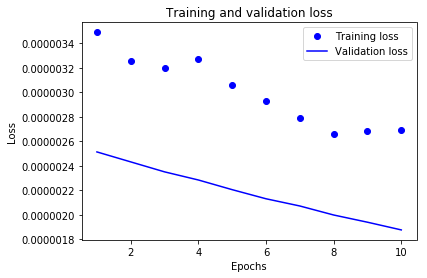

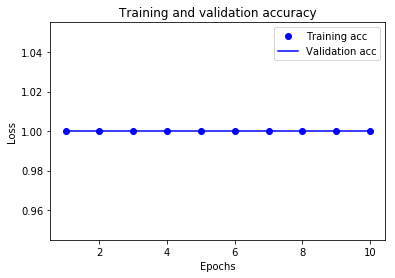


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 31s 5ms/step - loss: 2.3895e-06 - categorical_accuracy: 1.0000 - val_loss: 2.2897e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 31s 5ms/step - loss: 2.3286e-06 - categorical_accuracy: 1.0000 - val_loss: 2.2264e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 41s 7ms/step - loss: 2.4363e-06 - categorical_accuracy: 1.0000 - val_loss: 2.1439e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 37s 6ms/step - loss: 2.1186e-06 - categorical_accuracy: 1.0000 - val_loss: 2.0881e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 2.0819e-06 - categorical_accuracy: 1.0000 - val_loss: 2.0261e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 3

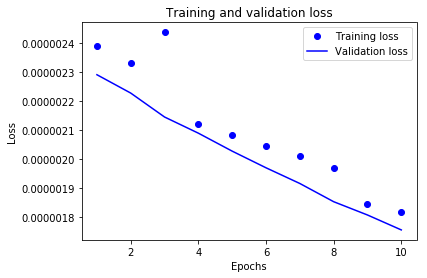

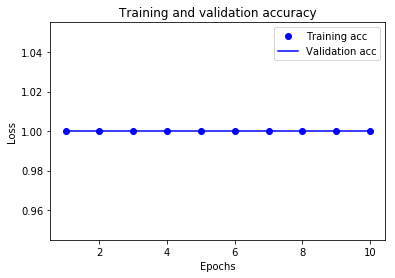

In [45]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Model 5

In [46]:
model = Sequential()
model.add(Embedding(vocab_len,100, input_length=100))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(120,recurrent_dropout=0.2))
model.add(Dense(4, activation='sigmoid'))

#### Accuracy

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               88800     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 484       
Total params: 2,179,848
Trainable params: 2,179,848
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 42s 7ms/step - loss: 1.2658 - acc: 0.4503 - val_loss: 0.7722 - val_acc: 0.6988
Epoch 2/10
6156/6156 [==============================] - 32s 5ms/step - loss: 0.5208 - acc: 0.8147 - val_loss: 0.4324 - val_acc: 0.8538
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.2642 - acc: 0.9100 - val_loss: 0.4370 - val_acc: 0.8523
Epoch 4/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.1563 - acc: 0.9518 - val_loss: 0.4685 - val_acc: 0.8626
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.1065 - acc: 0.9669 - val_loss: 0.4763 - val_acc: 0.8670
Epoch 6/10
6156/6156 [==============================] - 37s 6ms/step - loss: 0.0647 - acc: 0.9800 - val_loss: 0.5429 - val_acc: 0.8567
Epoch 7/10
6156/6156 [==============================] - 39s 6ms/step - loss: 0.0427 - acc: 0.9868 - val_loss: 0.6772 - val_acc: 0.846

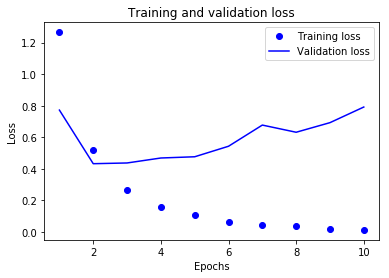

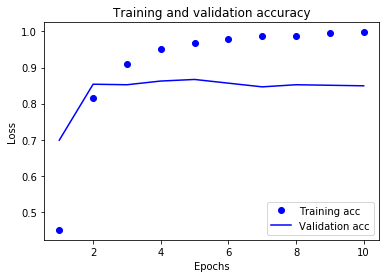


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 34s 5ms/step - loss: 0.0925 - acc: 0.9781 - val_loss: 0.0428 - val_acc: 0.9868
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0470 - acc: 0.9877 - val_loss: 0.0396 - val_acc: 0.9839
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0238 - acc: 0.9946 - val_loss: 0.0631 - val_acc: 0.9751
Epoch 4/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0117 - acc: 0.9981 - val_loss: 0.0712 - val_acc: 0.9781
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0098 - acc: 0.9977 - val_loss: 0.0845 - val_acc: 0.9766
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0161 - acc: 0.9958 - val_loss: 0.1047 - val_acc: 0.9649
Epoch 7/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0069 - acc: 0.9984 - val_loss: 0.1071 - val_acc: 0.973

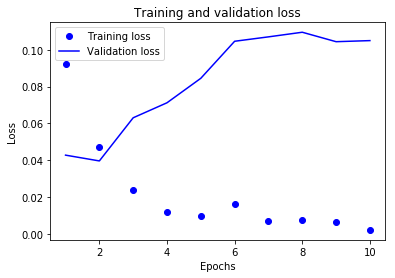

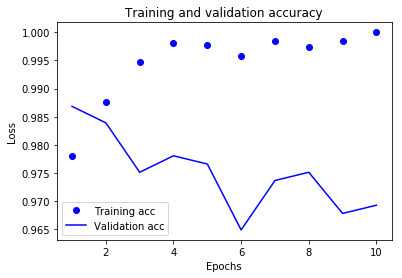


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 36s 6ms/step - loss: 0.0184 - acc: 0.9953 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 37s 6ms/step - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0051 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 32s 5ms/step - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0129 - val_acc: 0.9956
Epoch 4/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0056 - acc: 0.9984 - val_loss: 0.0140 - val_acc: 0.9971
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0064 - acc: 0.9982 - val_loss: 0.0185 - val_acc: 0.9956
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 0.0213 - val_acc: 0.9942
Epoch 7/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 0.0420 - val_acc: 0.988

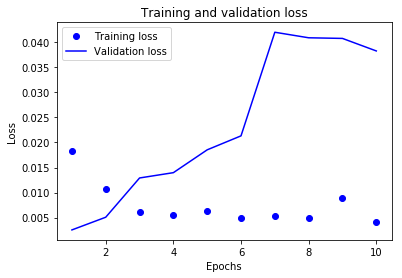

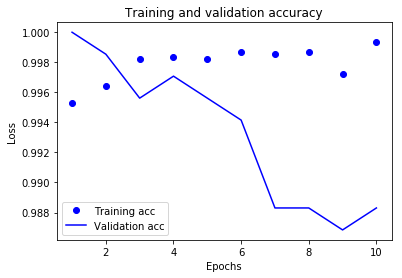


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0118 - acc: 0.9968 - val_loss: 0.0031 - val_acc: 0.9985
Epoch 2/10
6156/6156 [==============================] - 34s 5ms/step - loss: 0.0065 - acc: 0.9982 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0053 - val_acc: 0.9985
Epoch 4/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.0045 - val_acc: 0.9985
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.0023 - acc: 0.9997 - val_loss: 0.0039 - val_acc: 0.9985
Epoch 7/10
6156/6156 [==============================] - 33s 5ms/step - loss: 0.0020 - acc: 0.9997 - val_loss: 0.0048 - val_acc: 0.998

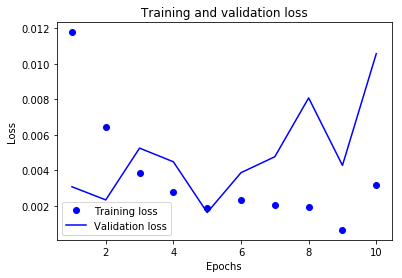

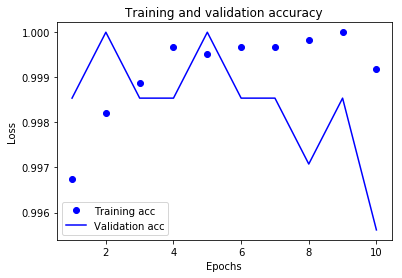


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 41s 7ms/step - loss: 0.0041 - acc: 0.9989 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.0070 - acc: 0.9985 - val_loss: 0.0044 - val_acc: 0.9985
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.0034 - val_acc: 0.9985
Epoch 4/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0028 - acc: 0.9989 - val_loss: 0.0045 - val_acc: 0.9985
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 32s 5ms/step - loss: 4.1314e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 28s 5ms/step - loss: 2.6235e-04 - acc: 1.0000 - val_loss: 0.0015 - val_ac

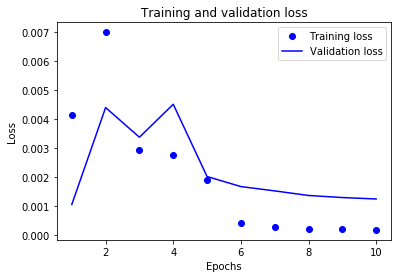

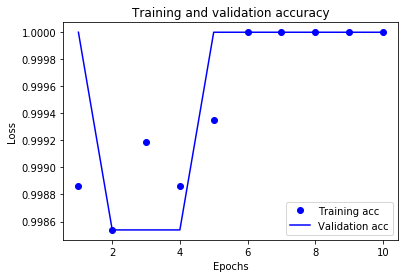


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 3.0973e-04 - acc: 1.0000 - val_loss: 8.2931e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 3.5328e-04 - acc: 1.0000 - val_loss: 8.1005e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0016 - acc: 0.9994 - val_loss: 1.3236e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 8.1591e-04 - acc: 0.9998 - val_loss: 3.4813e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0038 - acc: 0.9985 - val_loss: 0.0018 - val_acc: 0.9985
Epoch 6/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.0023 - val_acc: 0.9985
Epoch 7/10
6156/6156 [==============================] - 29s 5ms/step - loss: 6.1863e-04 - acc: 0.9998 - v

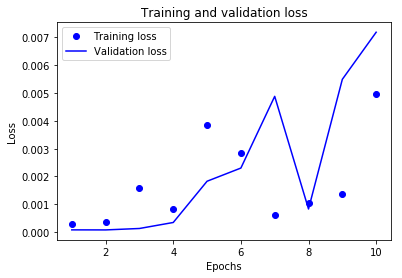

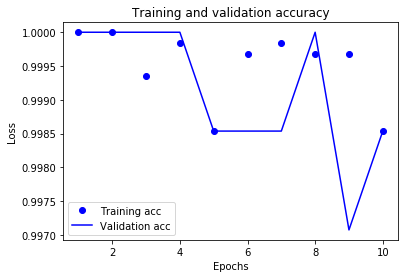


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0045 - acc: 0.9985 - val_loss: 0.0021 - val_acc: 0.9985
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0152 - acc: 0.9961 - val_loss: 0.0080 - val_acc: 0.9956
Epoch 3/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0162 - val_acc: 0.9927
Epoch 4/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.0032 - acc: 0.9994 - val_loss: 0.0125 - val_acc: 0.9985
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0127 - val_acc: 0.9971
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0171 - val_acc: 0.9956
Epoch 7/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0030 - acc: 0.9992 - val_loss: 0.0188 - val_acc: 0.994

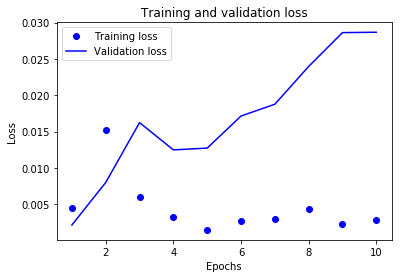

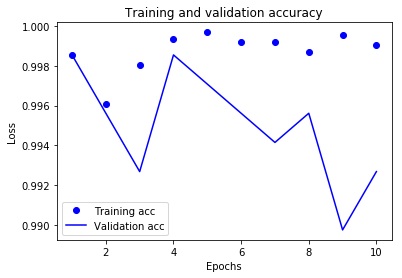


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 34s 5ms/step - loss: 0.0051 - acc: 0.9987 - val_loss: 6.4252e-04 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 33s 5ms/step - loss: 7.3868e-04 - acc: 1.0000 - val_loss: 2.3152e-04 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 30s 5ms/step - loss: 3.4160e-04 - acc: 1.0000 - val_loss: 1.5284e-04 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 31s 5ms/step - loss: 2.6230e-04 - acc: 1.0000 - val_loss: 1.1755e-04 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.6464e-04 - acc: 1.0000 - val_loss: 1.1091e-04 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.5194e-04 - acc: 1.0000 - val_loss: 9.7639e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.0011 - acc

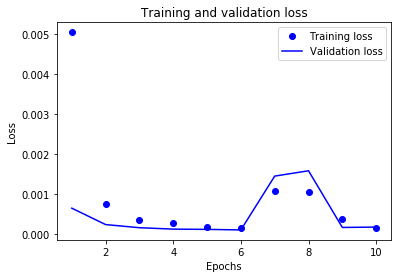

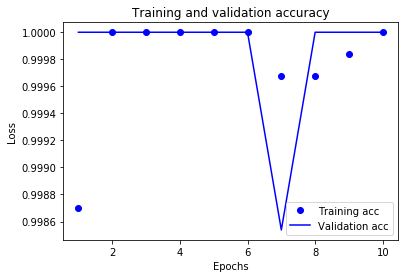


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 6.7040e-04 - acc: 0.9997 - val_loss: 6.0954e-05 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 31s 5ms/step - loss: 1.1946e-04 - acc: 1.0000 - val_loss: 5.5462e-05 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.2530e-04 - acc: 1.0000 - val_loss: 6.9668e-05 - val_acc: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.3258e-04 - acc: 1.0000 - val_loss: 7.2698e-05 - val_acc: 1.0000
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 6.7585e-04 - acc: 0.9998 - val_loss: 5.0693e-05 - val_acc: 1.0000
Epoch 6/10
6156/6156 [==============================] - 31s 5ms/step - loss: 1.1991e-04 - acc: 1.0000 - val_loss: 4.3585e-05 - val_acc: 1.0000
Epoch 7/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.2316e-

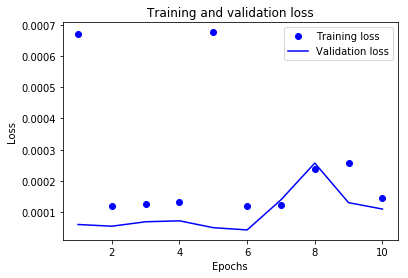

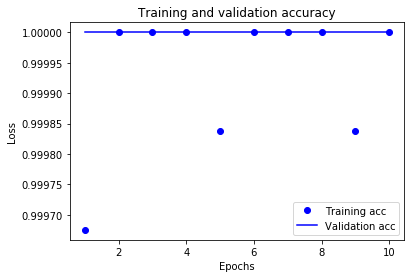


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 6.5787e-04 - acc: 0.9997 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0020 - acc: 0.9990 - val_loss: 1.0037e-04 - val_acc: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.0055 - acc: 0.9984 - val_loss: 0.0281 - val_acc: 0.9898
Epoch 4/10
6156/6156 [==============================] - 33s 5ms/step - loss: 0.0120 - acc: 0.9956 - val_loss: 0.0109 - val_acc: 0.9942
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.0180 - acc: 0.9948 - val_loss: 0.0129 - val_acc: 0.9956
Epoch 6/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.0052 - acc: 0.9982 - val_loss: 0.0221 - val_acc: 0.9942
Epoch 7/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0343 - val_a

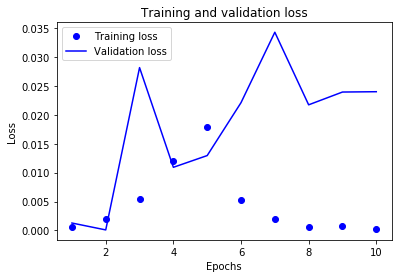

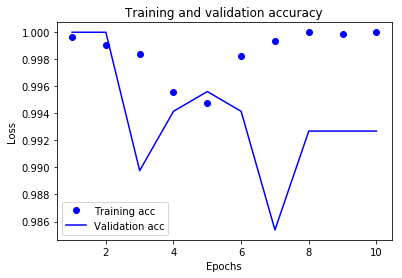

In [48]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#### Categorical Accuracy

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 64)            32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               88800     
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 484       
Total params: 2,179,848
Trainable params: 2,179,848
Non-trainable params: 0
_________________________________________________________________



 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 42s 7ms/step - loss: 0.0062 - categorical_accuracy: 0.9987 - val_loss: 1.4645e-04 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 6.8207e-04 - categorical_accuracy: 0.9995 - val_loss: 9.7380e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 7.5202e-04 - categorical_accuracy: 0.9997 - val_loss: 1.2893e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.0325e-04 - categorical_accuracy: 1.0000 - val_loss: 9.6747e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 33s 5ms/step - loss: 6.3813e-05 - categorical_accuracy: 1.0000 - val_loss: 8.8939e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 28s 5m

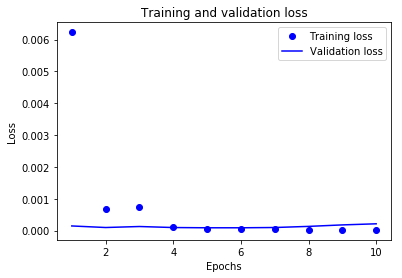

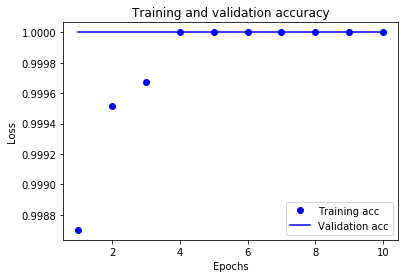


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 36s 6ms/step - loss: 0.0022 - categorical_accuracy: 0.9997 - val_loss: 6.6439e-05 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 32s 5ms/step - loss: 1.5401e-04 - categorical_accuracy: 1.0000 - val_loss: 4.1638e-05 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 30s 5ms/step - loss: 4.6366e-05 - categorical_accuracy: 1.0000 - val_loss: 3.3088e-05 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 28s 4ms/step - loss: 3.5656e-05 - categorical_accuracy: 1.0000 - val_loss: 3.0282e-05 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 28s 4ms/step - loss: 2.4892e-05 - categorical_accuracy: 1.0000 - val_loss: 2.6660e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 28s 5m

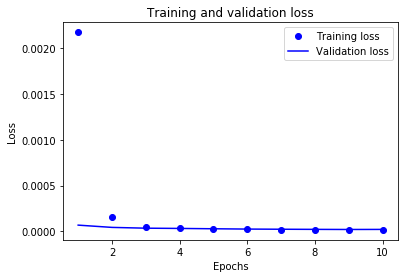

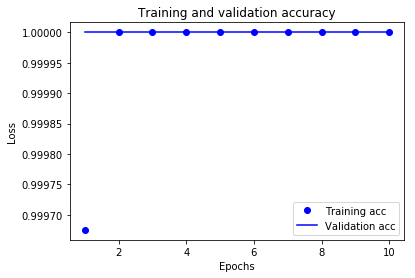


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 31s 5ms/step - loss: 1.4024e-05 - categorical_accuracy: 1.0000 - val_loss: 9.1904e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.2274e-05 - categorical_accuracy: 1.0000 - val_loss: 8.4419e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.0768e-05 - categorical_accuracy: 1.0000 - val_loss: 7.8395e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 9.3304e-06 - categorical_accuracy: 1.0000 - val_loss: 7.3261e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 31s 5ms/step - loss: 8.5520e-06 - categorical_accuracy: 1.0000 - val_loss: 6.8564e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 30

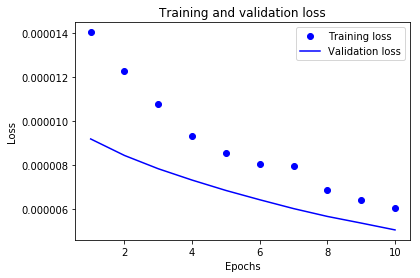

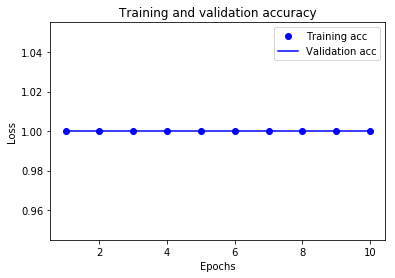


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 5.8049e-06 - categorical_accuracy: 1.0000 - val_loss: 4.3644e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 32s 5ms/step - loss: 5.4229e-06 - categorical_accuracy: 1.0000 - val_loss: 4.1280e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 30s 5ms/step - loss: 5.4572e-06 - categorical_accuracy: 1.0000 - val_loss: 3.9213e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 30s 5ms/step - loss: 4.9630e-06 - categorical_accuracy: 1.0000 - val_loss: 3.7063e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 5.0570e-06 - categorical_accuracy: 1.0000 - val_loss: 3.5234e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 30

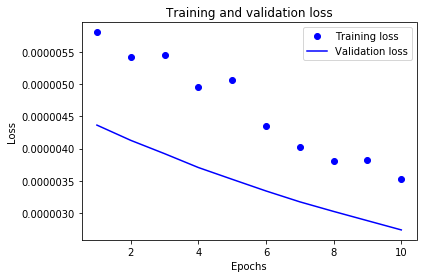

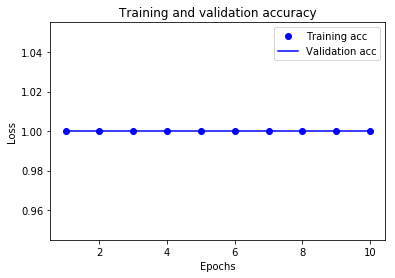


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 31s 5ms/step - loss: 3.1519e-06 - categorical_accuracy: 1.0000 - val_loss: 4.0593e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 2.9886e-06 - categorical_accuracy: 1.0000 - val_loss: 3.9174e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 2.8637e-06 - categorical_accuracy: 1.0000 - val_loss: 3.7806e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 30s 5ms/step - loss: 2.7898e-06 - categorical_accuracy: 1.0000 - val_loss: 3.6519e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 32s 5ms/step - loss: 2.6924e-06 - categorical_accuracy: 1.0000 - val_loss: 3.5228e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 30

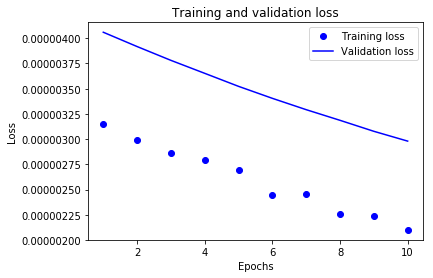

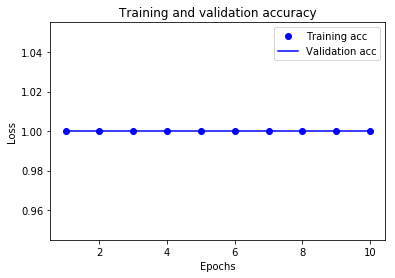


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 28s 5ms/step - loss: 2.1546e-06 - categorical_accuracy: 1.0000 - val_loss: 1.5837e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 2.0171e-06 - categorical_accuracy: 1.0000 - val_loss: 1.5191e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.9829e-06 - categorical_accuracy: 1.0000 - val_loss: 1.4598e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 28s 5ms/step - loss: 1.9763e-06 - categorical_accuracy: 1.0000 - val_loss: 1.4028e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.8156e-06 - categorical_accuracy: 1.0000 - val_loss: 1.3490e-06 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 30

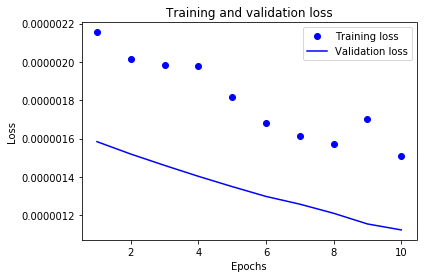

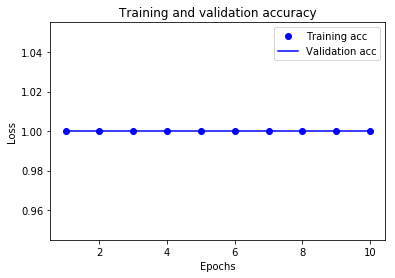


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.3898e-06 - categorical_accuracy: 1.0000 - val_loss: 1.0470e-06 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 4.4730e-06 - categorical_accuracy: 1.0000 - val_loss: 1.3782e-06 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 2.3558e-06 - categorical_accuracy: 1.0000 - val_loss: 1.0529e-06 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.4875e-06 - categorical_accuracy: 1.0000 - val_loss: 1.0102e-06 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 1.3696e-06 - categorical_accuracy: 1.0000 - val_loss: 9.6317e-07 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 31

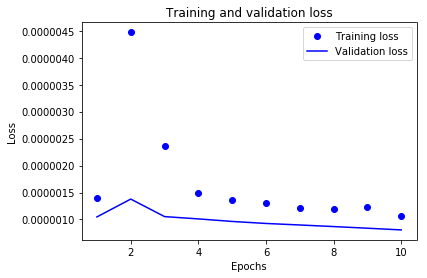

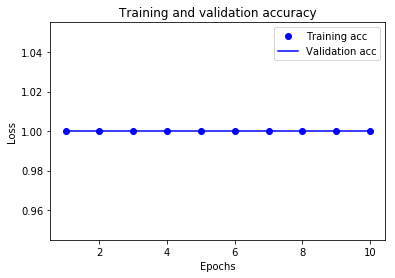


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.1053e-06 - categorical_accuracy: 1.0000 - val_loss: 7.1168e-07 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 1.1607e-06 - categorical_accuracy: 1.0000 - val_loss: 6.8711e-07 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 30s 5ms/step - loss: 9.7831e-07 - categorical_accuracy: 1.0000 - val_loss: 6.5940e-07 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 9.3665e-07 - categorical_accuracy: 1.0000 - val_loss: 6.4066e-07 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 9.8389e-07 - categorical_accuracy: 1.0000 - val_loss: 6.1313e-07 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 29

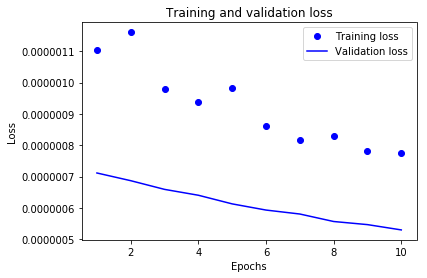

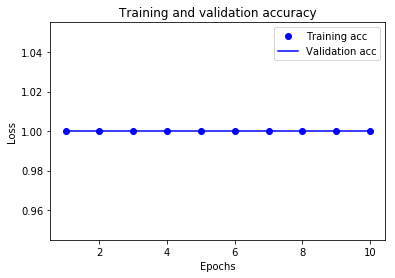


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 32s 5ms/step - loss: 7.2403e-07 - categorical_accuracy: 1.0000 - val_loss: 5.0647e-07 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 7.3525e-07 - categorical_accuracy: 1.0000 - val_loss: 4.9453e-07 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 29s 5ms/step - loss: 7.1249e-07 - categorical_accuracy: 1.0000 - val_loss: 4.6917e-07 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 6.6625e-07 - categorical_accuracy: 1.0000 - val_loss: 4.6185e-07 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 31s 5ms/step - loss: 6.4823e-07 - categorical_accuracy: 1.0000 - val_loss: 4.4974e-07 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 31

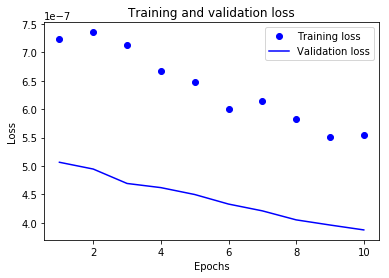

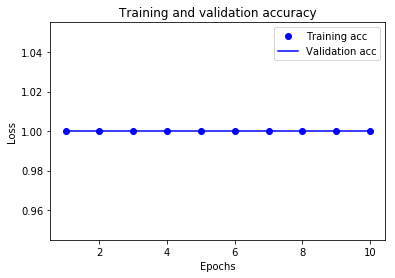


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 29s 5ms/step - loss: 5.1524e-07 - categorical_accuracy: 1.0000 - val_loss: 5.1736e-07 - val_categorical_accuracy: 1.0000
Epoch 2/10
6156/6156 [==============================] - 29s 5ms/step - loss: 4.9416e-07 - categorical_accuracy: 1.0000 - val_loss: 5.0594e-07 - val_categorical_accuracy: 1.0000
Epoch 3/10
6156/6156 [==============================] - 30s 5ms/step - loss: 4.8290e-07 - categorical_accuracy: 1.0000 - val_loss: 4.9226e-07 - val_categorical_accuracy: 1.0000
Epoch 4/10
6156/6156 [==============================] - 30s 5ms/step - loss: 4.7064e-07 - categorical_accuracy: 1.0000 - val_loss: 4.7727e-07 - val_categorical_accuracy: 1.0000
Epoch 5/10
6156/6156 [==============================] - 30s 5ms/step - loss: 4.4498e-07 - categorical_accuracy: 1.0000 - val_loss: 4.6246e-07 - val_categorical_accuracy: 1.0000
Epoch 6/10
6156/6156 [==============================] - 3

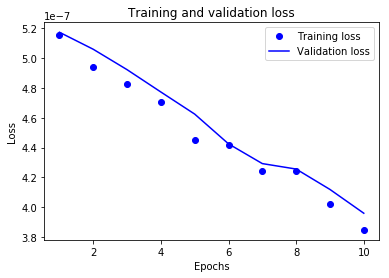

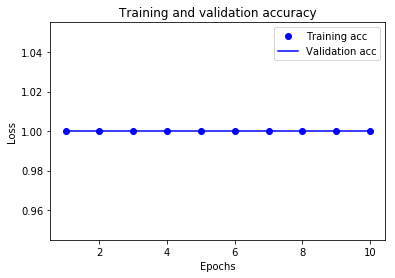

In [50]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Model 6

In [51]:
model = Sequential()
model.add(Embedding(vocab_len,100, input_length=100))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

#### Accuracy

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 98, 128)           38528     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 32, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 30, 128)           49280     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 8, 128)            49280     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 128)            0         
__________


 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 36s 6ms/step - loss: 1.3556 - acc: 0.2995 - val_loss: 1.2297 - val_acc: 0.4401
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 1.0815 - acc: 0.4703 - val_loss: 1.0899 - val_acc: 0.4781
Epoch 3/10
6156/6156 [==============================] - 23s 4ms/step - loss: 0.7065 - acc: 0.7019 - val_loss: 0.9509 - val_acc: 0.6360
Epoch 4/10
6156/6156 [==============================] - 23s 4ms/step - loss: 0.4720 - acc: 0.7997 - val_loss: 1.0003 - val_acc: 0.6564
Epoch 5/10
6156/6156 [==============================] - 23s 4ms/step - loss: 0.3568 - acc: 0.8441 - val_loss: 1.2338 - val_acc: 0.6491
Epoch 6/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.3113 - acc: 0.8580 - val_loss: 1.3591 - val_acc: 0.6535
Epoch 7/10
6156/6156 [==============================] - 23s 4ms/step - loss: 0.2929 - acc: 0.8650 - val_loss: 1.4866 - val_acc: 0.655

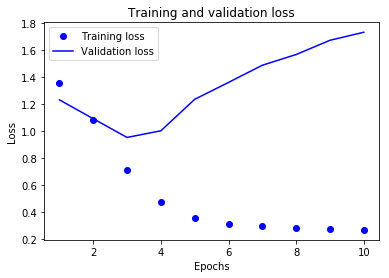

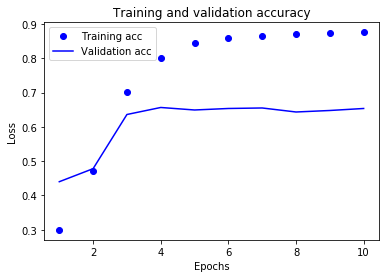


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.4202 - acc: 0.8397 - val_loss: 0.3515 - val_acc: 0.8582
Epoch 2/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.3229 - acc: 0.8585 - val_loss: 0.3402 - val_acc: 0.8480
Epoch 3/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2763 - acc: 0.8713 - val_loss: 0.3452 - val_acc: 0.8392
Epoch 4/10
6156/6156 [==============================] - 23s 4ms/step - loss: 0.2634 - acc: 0.8752 - val_loss: 0.3555 - val_acc: 0.8421
Epoch 5/10
6156/6156 [==============================] - 23s 4ms/step - loss: 0.2607 - acc: 0.8749 - val_loss: 0.3554 - val_acc: 0.8377
Epoch 6/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2570 - acc: 0.8787 - val_loss: 0.3736 - val_acc: 0.8480
Epoch 7/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2552 - acc: 0.8778 - val_loss: 0.3671 - val_acc: 0.839

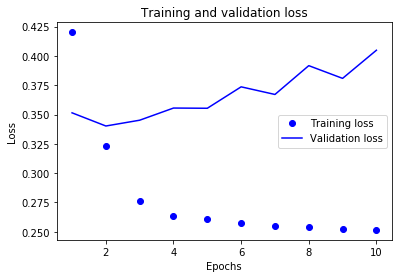

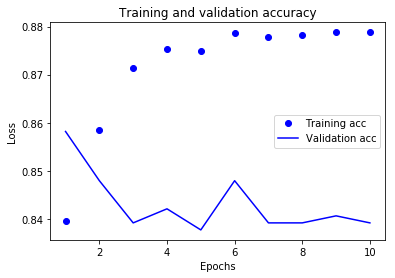


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2786 - acc: 0.8699 - val_loss: 0.2298 - val_acc: 0.8874
Epoch 2/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2746 - acc: 0.8725 - val_loss: 0.2408 - val_acc: 0.8860
Epoch 3/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2733 - acc: 0.8720 - val_loss: 0.2426 - val_acc: 0.8830
Epoch 4/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2802 - acc: 0.8718 - val_loss: 0.2687 - val_acc: 0.8772
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2760 - acc: 0.8718 - val_loss: 0.2484 - val_acc: 0.8874
Epoch 6/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2702 - acc: 0.8731 - val_loss: 0.2509 - val_acc: 0.8874
Epoch 7/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2600 - acc: 0.8767 - val_loss: 0.2558 - val_acc: 0.884

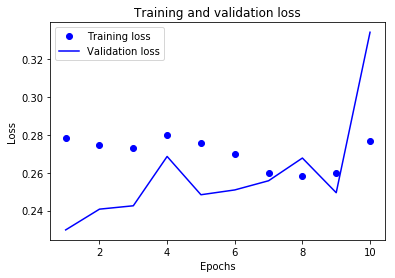

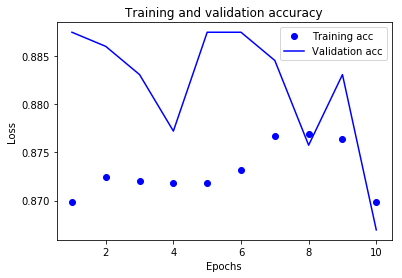


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.3013 - acc: 0.8658 - val_loss: 0.2721 - val_acc: 0.8801
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2747 - acc: 0.8715 - val_loss: 0.3075 - val_acc: 0.8743
Epoch 3/10
6156/6156 [==============================] - 33s 5ms/step - loss: 0.2622 - acc: 0.8752 - val_loss: 0.2906 - val_acc: 0.8757
Epoch 4/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2544 - acc: 0.8767 - val_loss: 0.2869 - val_acc: 0.8743
Epoch 5/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2524 - acc: 0.8780 - val_loss: 0.2792 - val_acc: 0.8757
Epoch 6/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2523 - acc: 0.8782 - val_loss: 0.2816 - val_acc: 0.8743
Epoch 7/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2518 - acc: 0.8770 - val_loss: 0.2819 - val_acc: 0.872

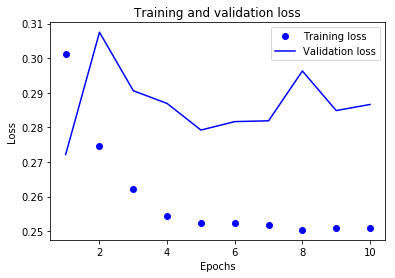

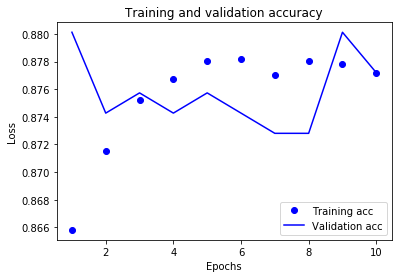


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2578 - acc: 0.8780 - val_loss: 0.2661 - val_acc: 0.8670
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2636 - acc: 0.8756 - val_loss: 0.2673 - val_acc: 0.8713
Epoch 3/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2620 - acc: 0.8765 - val_loss: 0.2846 - val_acc: 0.8626
Epoch 4/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2622 - acc: 0.8759 - val_loss: 0.2816 - val_acc: 0.8655
Epoch 5/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2538 - acc: 0.8783 - val_loss: 0.2780 - val_acc: 0.8655
Epoch 6/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2520 - acc: 0.8782 - val_loss: 0.2856 - val_acc: 0.8655
Epoch 7/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2502 - acc: 0.8791 - val_loss: 0.2811 - val_acc: 0.867

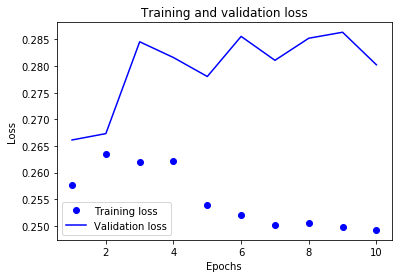

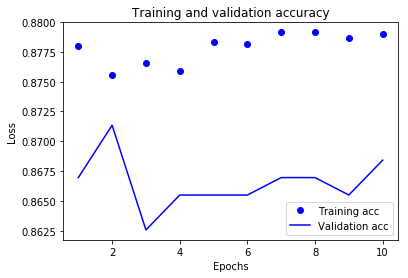


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.2546 - acc: 0.8783 - val_loss: 0.2546 - val_acc: 0.8684
Epoch 2/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.2523 - acc: 0.8790 - val_loss: 0.2572 - val_acc: 0.8670
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2502 - acc: 0.8796 - val_loss: 0.2616 - val_acc: 0.8640
Epoch 4/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2526 - acc: 0.8791 - val_loss: 0.2633 - val_acc: 0.8655
Epoch 5/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2501 - acc: 0.8798 - val_loss: 0.2675 - val_acc: 0.8655
Epoch 6/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2498 - acc: 0.8783 - val_loss: 0.2692 - val_acc: 0.8626
Epoch 7/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2494 - acc: 0.8795 - val_loss: 0.2719 - val_acc: 0.865

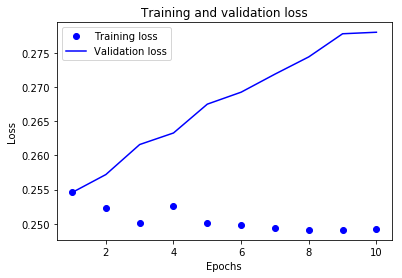

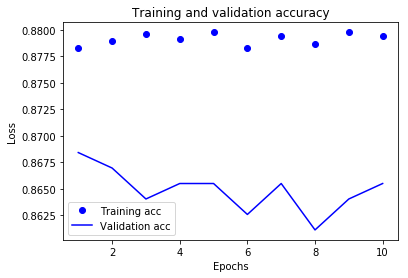


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2491 - acc: 0.8796 - val_loss: 0.2835 - val_acc: 0.8655
Epoch 2/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2468 - acc: 0.8804 - val_loss: 0.2838 - val_acc: 0.8640
Epoch 3/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2465 - acc: 0.8796 - val_loss: 0.2887 - val_acc: 0.8655
Epoch 4/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2460 - acc: 0.8800 - val_loss: 0.2909 - val_acc: 0.8626
Epoch 5/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2461 - acc: 0.8806 - val_loss: 0.2963 - val_acc: 0.8626
Epoch 6/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2458 - acc: 0.8809 - val_loss: 0.2945 - val_acc: 0.8640
Epoch 7/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2454 - acc: 0.8796 - val_loss: 0.3018 - val_acc: 0.864

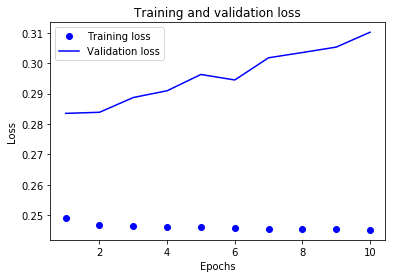

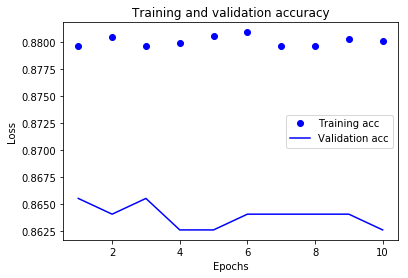


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2537 - acc: 0.8782 - val_loss: 0.2393 - val_acc: 0.8845
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2518 - acc: 0.8778 - val_loss: 0.2411 - val_acc: 0.8801
Epoch 3/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2666 - acc: 0.8735 - val_loss: 0.3807 - val_acc: 0.8509
Epoch 4/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.3138 - acc: 0.8618 - val_loss: 0.2755 - val_acc: 0.8684
Epoch 5/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2861 - acc: 0.8692 - val_loss: 0.3316 - val_acc: 0.8509
Epoch 6/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.2716 - acc: 0.8739 - val_loss: 0.3003 - val_acc: 0.8582
Epoch 7/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2569 - acc: 0.8778 - val_loss: 0.2964 - val_acc: 0.867

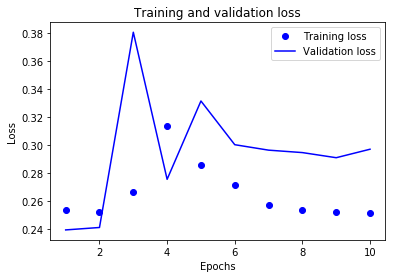

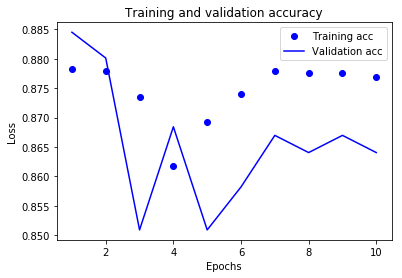


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2569 - acc: 0.8782 - val_loss: 0.2422 - val_acc: 0.8787
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2521 - acc: 0.8774 - val_loss: 0.2450 - val_acc: 0.8743
Epoch 3/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2511 - acc: 0.8788 - val_loss: 0.2470 - val_acc: 0.8787
Epoch 4/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2513 - acc: 0.8782 - val_loss: 0.2490 - val_acc: 0.8772
Epoch 5/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2501 - acc: 0.8791 - val_loss: 0.2520 - val_acc: 0.8772
Epoch 6/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2502 - acc: 0.8787 - val_loss: 0.2536 - val_acc: 0.8772
Epoch 7/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2499 - acc: 0.8782 - val_loss: 0.2558 - val_acc: 0.878

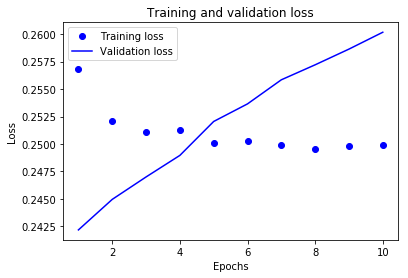

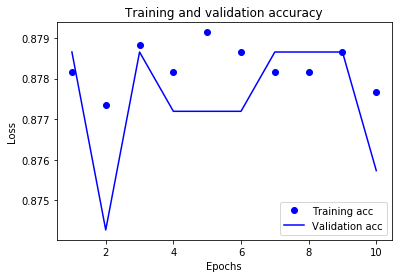


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2518 - acc: 0.8762 - val_loss: 0.2438 - val_acc: 0.8816
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2504 - acc: 0.8782 - val_loss: 0.2453 - val_acc: 0.8816
Epoch 3/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2495 - acc: 0.8788 - val_loss: 0.2497 - val_acc: 0.8787
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2497 - acc: 0.8787 - val_loss: 0.2494 - val_acc: 0.8787
Epoch 5/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2495 - acc: 0.8783 - val_loss: 0.2576 - val_acc: 0.8772
Epoch 6/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2495 - acc: 0.8783 - val_loss: 0.2522 - val_acc: 0.8801
Epoch 7/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2494 - acc: 0.8785 - val_loss: 0.2591 - val_acc: 0.87

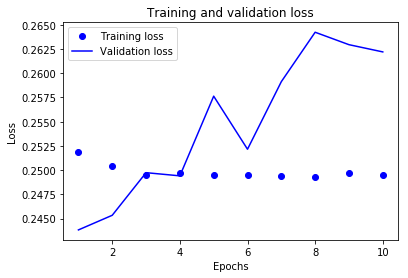

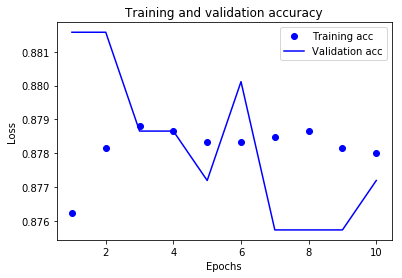

In [53]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

#### Categorical Accuracy

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam',    metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          2058500   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 98, 128)           38528     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 32, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 30, 128)           49280     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 8, 128)            49280     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 2, 128)            0         
__________


 Fold  1
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 38s 6ms/step - loss: 0.2531 - categorical_accuracy: 0.8777 - val_loss: 0.2601 - val_categorical_accuracy: 0.8728
Epoch 2/10
6156/6156 [==============================] - 30s 5ms/step - loss: 0.2496 - categorical_accuracy: 0.8778 - val_loss: 0.2610 - val_categorical_accuracy: 0.8743
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2503 - categorical_accuracy: 0.8772 - val_loss: 0.2640 - val_categorical_accuracy: 0.8713
Epoch 4/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.2542 - categorical_accuracy: 0.8765 - val_loss: 0.2705 - val_categorical_accuracy: 0.8699
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2499 - categorical_accuracy: 0.8780 - val_loss: 0.2626 - val_categorical_accuracy: 0.8728
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2481 - categorical_

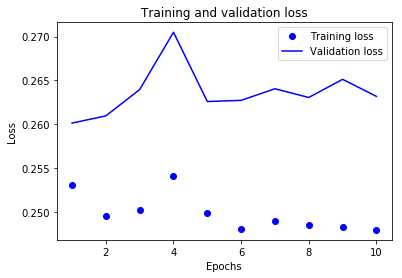

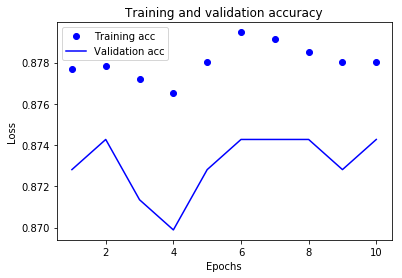


 Fold  2
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2475 - categorical_accuracy: 0.8793 - val_loss: 0.2659 - val_categorical_accuracy: 0.8743
Epoch 2/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.2479 - categorical_accuracy: 0.8795 - val_loss: 0.2683 - val_categorical_accuracy: 0.8728
Epoch 3/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2474 - categorical_accuracy: 0.8803 - val_loss: 0.2725 - val_categorical_accuracy: 0.8728
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2472 - categorical_accuracy: 0.8795 - val_loss: 0.2811 - val_categorical_accuracy: 0.8743
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2470 - categorical_accuracy: 0.8798 - val_loss: 0.2872 - val_categorical_accuracy: 0.8713
Epoch 6/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2466 - categorical_

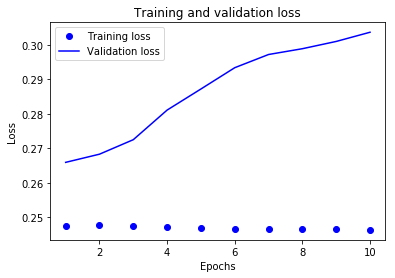

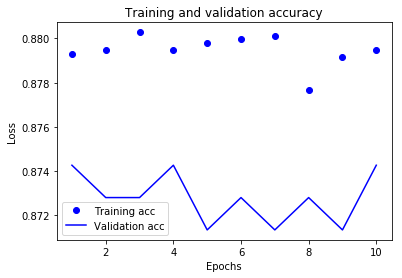


 Fold  3
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 24s 4ms/step - loss: 0.2565 - categorical_accuracy: 0.8765 - val_loss: 0.2098 - val_categorical_accuracy: 0.8947
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2547 - categorical_accuracy: 0.8764 - val_loss: 0.2087 - val_categorical_accuracy: 0.8962
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2548 - categorical_accuracy: 0.8769 - val_loss: 0.2106 - val_categorical_accuracy: 0.8933
Epoch 4/10
6156/6156 [==============================] - 37s 6ms/step - loss: 0.2542 - categorical_accuracy: 0.8762 - val_loss: 0.2098 - val_categorical_accuracy: 0.8933
Epoch 5/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.2536 - categorical_accuracy: 0.8764 - val_loss: 0.2103 - val_categorical_accuracy: 0.8933
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2533 - categorical_

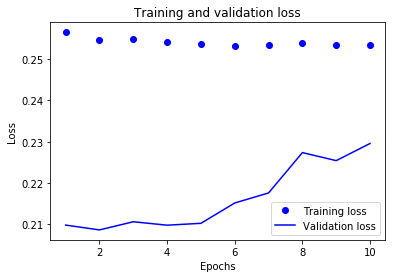

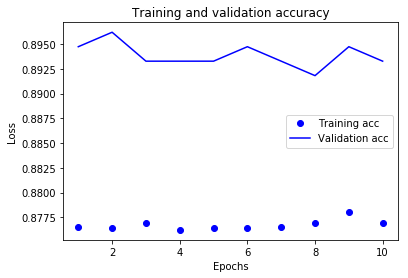


 Fold  4
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2510 - categorical_accuracy: 0.8774 - val_loss: 0.2495 - val_categorical_accuracy: 0.8860
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2490 - categorical_accuracy: 0.8782 - val_loss: 0.2516 - val_categorical_accuracy: 0.8860
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2512 - categorical_accuracy: 0.8791 - val_loss: 0.3388 - val_categorical_accuracy: 0.8713
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2905 - categorical_accuracy: 0.8686 - val_loss: 0.3735 - val_categorical_accuracy: 0.8611
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.3170 - categorical_accuracy: 0.8624 - val_loss: 0.3311 - val_categorical_accuracy: 0.8611
Epoch 6/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.2551 - categorical_

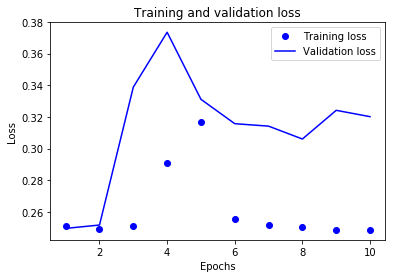

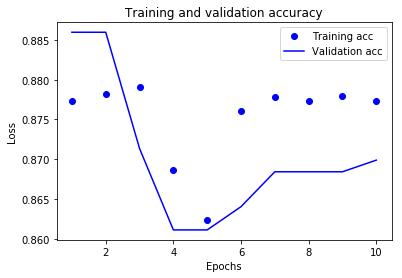


 Fold  5
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2599 - categorical_accuracy: 0.8767 - val_loss: 0.2595 - val_categorical_accuracy: 0.8713
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2508 - categorical_accuracy: 0.8795 - val_loss: 0.2608 - val_categorical_accuracy: 0.8713
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2482 - categorical_accuracy: 0.8801 - val_loss: 0.2616 - val_categorical_accuracy: 0.8713
Epoch 4/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2478 - categorical_accuracy: 0.8796 - val_loss: 0.2622 - val_categorical_accuracy: 0.8713
Epoch 5/10
6156/6156 [==============================] - 29s 5ms/step - loss: 0.2476 - categorical_accuracy: 0.8795 - val_loss: 0.2629 - val_categorical_accuracy: 0.8713
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2475 - categorical_

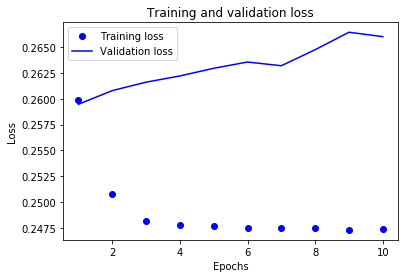

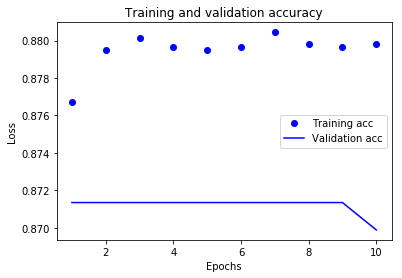


 Fold  6
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2491 - categorical_accuracy: 0.8796 - val_loss: 0.2499 - val_categorical_accuracy: 0.8713
Epoch 2/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2482 - categorical_accuracy: 0.8801 - val_loss: 0.2513 - val_categorical_accuracy: 0.8713
Epoch 3/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2485 - categorical_accuracy: 0.8796 - val_loss: 0.2526 - val_categorical_accuracy: 0.8684
Epoch 4/10
6156/6156 [==============================] - 28s 4ms/step - loss: 0.2483 - categorical_accuracy: 0.8801 - val_loss: 0.2549 - val_categorical_accuracy: 0.8684
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2480 - categorical_accuracy: 0.8796 - val_loss: 0.2593 - val_categorical_accuracy: 0.8684
Epoch 6/10
6156/6156 [==============================] - 28s 5ms/step - loss: 0.2481 - categorical_

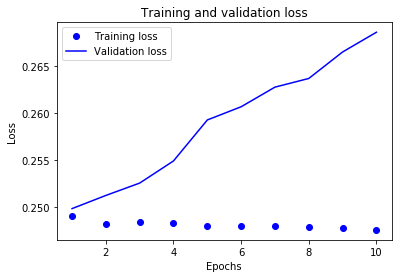

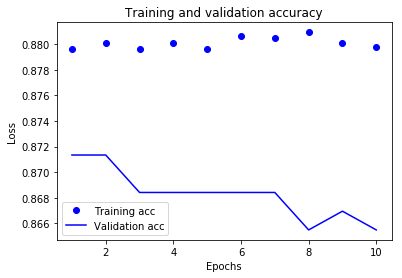


 Fold  7
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2470 - categorical_accuracy: 0.8800 - val_loss: 0.2797 - val_categorical_accuracy: 0.8699
Epoch 2/10
6156/6156 [==============================] - 31s 5ms/step - loss: 0.2451 - categorical_accuracy: 0.8803 - val_loss: 0.2818 - val_categorical_accuracy: 0.8670
Epoch 3/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2449 - categorical_accuracy: 0.8806 - val_loss: 0.2825 - val_categorical_accuracy: 0.8655
Epoch 4/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2448 - categorical_accuracy: 0.8803 - val_loss: 0.2854 - val_categorical_accuracy: 0.8670
Epoch 5/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2450 - categorical_accuracy: 0.8813 - val_loss: 0.2879 - val_categorical_accuracy: 0.8640
Epoch 6/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2445 - categorical_

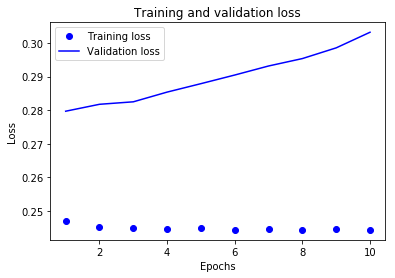

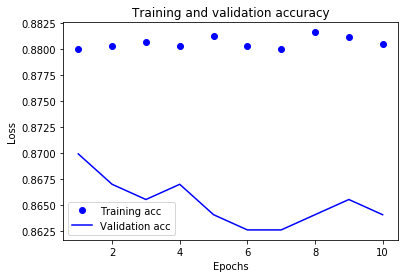


 Fold  8
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2517 - categorical_accuracy: 0.8791 - val_loss: 0.2381 - val_categorical_accuracy: 0.8801
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2500 - categorical_accuracy: 0.8783 - val_loss: 0.2381 - val_categorical_accuracy: 0.8816
Epoch 3/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2497 - categorical_accuracy: 0.8787 - val_loss: 0.2385 - val_categorical_accuracy: 0.8816
Epoch 4/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2499 - categorical_accuracy: 0.8793 - val_loss: 0.2391 - val_categorical_accuracy: 0.8816
Epoch 5/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2497 - categorical_accuracy: 0.8793 - val_loss: 0.2392 - val_categorical_accuracy: 0.8816
Epoch 6/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2496 - categorical_

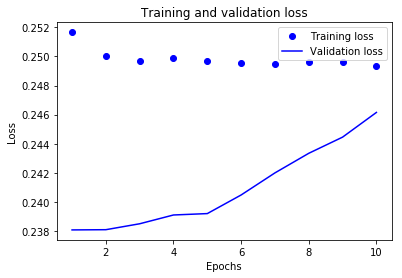

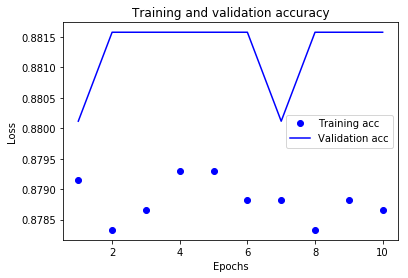


 Fold  9
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2504 - categorical_accuracy: 0.8787 - val_loss: 0.2396 - val_categorical_accuracy: 0.8816
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2497 - categorical_accuracy: 0.8785 - val_loss: 0.2408 - val_categorical_accuracy: 0.8801
Epoch 3/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2496 - categorical_accuracy: 0.8793 - val_loss: 0.2411 - val_categorical_accuracy: 0.8787
Epoch 4/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2495 - categorical_accuracy: 0.8783 - val_loss: 0.2418 - val_categorical_accuracy: 0.8816
Epoch 5/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2494 - categorical_accuracy: 0.8785 - val_loss: 0.2429 - val_categorical_accuracy: 0.8787
Epoch 6/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2493 - categorical_

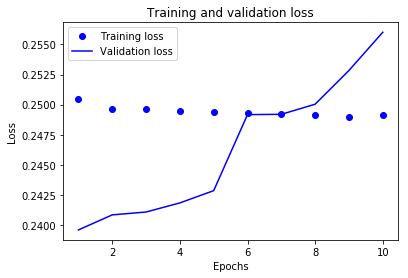

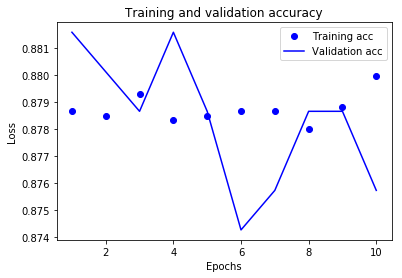


 Fold  10
Train on 6156 samples, validate on 684 samples
Epoch 1/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2511 - categorical_accuracy: 0.8777 - val_loss: 0.2429 - val_categorical_accuracy: 0.8816
Epoch 2/10
6156/6156 [==============================] - 25s 4ms/step - loss: 0.2496 - categorical_accuracy: 0.8788 - val_loss: 0.2441 - val_categorical_accuracy: 0.8801
Epoch 3/10
6156/6156 [==============================] - 27s 4ms/step - loss: 0.2490 - categorical_accuracy: 0.8790 - val_loss: 0.2436 - val_categorical_accuracy: 0.8816
Epoch 4/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2491 - categorical_accuracy: 0.8795 - val_loss: 0.2473 - val_categorical_accuracy: 0.8772
Epoch 5/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2491 - categorical_accuracy: 0.8793 - val_loss: 0.2536 - val_categorical_accuracy: 0.8787
Epoch 6/10
6156/6156 [==============================] - 26s 4ms/step - loss: 0.2489 - categorical

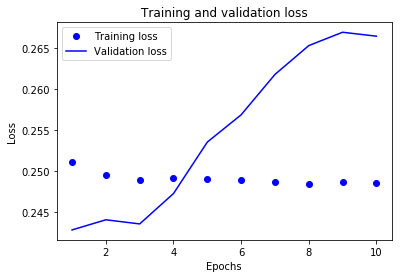

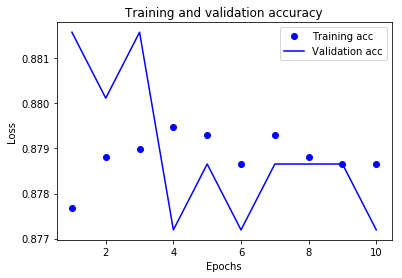

In [55]:
for i in range(0,10):
    print("\n Fold ",i+1)
    partial_content_train,partial_label_train,content_val, label_val=Valid_bag[i]
    history=model.fit(partial_content_train,partial_label_train,
                    epochs=10,
                    batch_size=100,validation_data=(content_val, label_val))
    Evaluated=model.evaluate(content_test,one_hot_test_labels)
    print("\n Loss:",Evaluated[0], "  Accuracy:",Evaluated[1])
    print("\n")
    plt.clf()   # clear figure
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    plt.clf()   # clear figure

    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()